In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HousePrices.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [4]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.duplicated().sum()

13

In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
df['Condition1'].value_counts()

Condition1
Norm      1782
Feedr      111
Artery      62
RRAn        39
PosN        24
RRAe        15
PosA        13
RRNn        12
RRNe         2
Name: count, dtype: int64

In [8]:
df['Condition2'].value_counts()

Condition2
Norm      2041
Feedr        9
Artery       2
RRNn         2
PosN         2
RRAn         2
PosA         1
RRAe         1
Name: count, dtype: int64

In [9]:
ct1 = pd.crosstab(df['Condition1'],df['Condition2'])

In [10]:
from scipy.stats import chi2_contingency

In [11]:
chi2_contingency(ct1)

Chi2ContingencyResult(statistic=585.3404391354637, pvalue=3.1048966523046823e-89, dof=56, expected_freq=array([[6.01941748e-02, 2.70873786e-01, 6.14281553e+01, 3.00970874e-02,
        6.01941748e-02, 3.00970874e-02, 6.01941748e-02, 6.01941748e-02],
       [1.07766990e-01, 4.84951456e-01, 1.09976214e+02, 5.38834951e-02,
        1.07766990e-01, 5.38834951e-02, 1.07766990e-01, 1.07766990e-01],
       [1.73009709e+00, 7.78543689e+00, 1.76556408e+03, 8.65048544e-01,
        1.73009709e+00, 8.65048544e-01, 1.73009709e+00, 1.73009709e+00],
       [1.26213592e-02, 5.67961165e-02, 1.28800971e+01, 6.31067961e-03,
        1.26213592e-02, 6.31067961e-03, 1.26213592e-02, 1.26213592e-02],
       [2.33009709e-02, 1.04854369e-01, 2.37786408e+01, 1.16504854e-02,
        2.33009709e-02, 1.16504854e-02, 2.33009709e-02, 2.33009709e-02],
       [1.45631068e-02, 6.55339806e-02, 1.48616505e+01, 7.28155340e-03,
        1.45631068e-02, 7.28155340e-03, 1.45631068e-02, 1.45631068e-02],
       [3.78640777e-02, 1.

In [12]:
ct2 = pd.crosstab(df['BsmtFinType1'],df['BsmtFinType2'])
chi2_contingency(ct2)

Chi2ContingencyResult(statistic=516.7088247701099, pvalue=2.642755337050005e-93, dof=25, expected_freq=array([[  3.80209895,   7.92103948,   3.48525737,  10.6141929 ,
         12.51524238, 278.66216892],
       [  2.50674663,   5.22238881,   2.29785107,   6.998001  ,
          8.25137431, 183.72363818],
       [  7.13643178,  14.86756622,   6.54172914,  19.92253873,
         23.49075462, 523.04097951],
       [  1.30734633,   2.72363818,   1.1984008 ,   3.64967516,
          4.30334833,  95.8175912 ],
       [  2.03898051,   4.24787606,   1.86906547,   5.69215392,
          6.71164418, 149.44027986],
       [  7.2083958 ,  15.01749125,   6.60769615,  20.12343828,
         23.72763618, 528.31534233]]))

In [13]:
ct3 = pd.crosstab(df['GarageQual'],df['GarageCond'])
chi2_contingency(ct3)

Chi2ContingencyResult(statistic=3022.6249979134577, pvalue=0.0, dof=16, expected_freq=array([[6.16332820e-03, 9.65588084e-02, 3.49255265e-02, 1.64355419e-02,
        3.84591680e+00],
       [1.00154083e-01, 1.56908064e+00, 5.67539805e-01, 2.67077555e-01,
        6.24961479e+01],
       [2.77349769e-02, 4.34514638e-01, 1.57164869e-01, 7.39599384e-02,
        1.73066256e+01],
       [4.62249615e-03, 7.24191063e-02, 2.61941448e-02, 1.23266564e-02,
        2.88443760e+00],
       [2.86132512e+00, 4.48274268e+01, 1.62141757e+01, 7.63020031e+00,
        1.78546687e+03]]))

In [14]:
df['GarageQual'].value_counts(dropna=False)

GarageQual
TA     1857
NaN     113
Fa       65
Gd       18
Ex        4
Po        3
Name: count, dtype: int64

In [15]:
df['GarageCond'].value_counts(dropna=False)

GarageCond
TA     1872
NaN     113
Fa       47
Gd       17
Po        8
Ex        3
Name: count, dtype: int64

In [16]:
df.groupby('Dwell_Type').agg({'Property_Sale_Price':['min','max','mean','median','count','std']})

Property_Sale_Price                                         \
                           min     max           mean    median count   
Dwell_Type                                                              
20                       35311  611657  184341.782427  159895.0   717   
30                       34900  394617  124374.431818  109700.0   132   
40                       79500  260000  177600.000000  152000.0     7   
45                       76000  139400  110961.538462  109500.0    13   
50                       37900  410000  148675.814634  135000.0   205   
60                       35311  755000  235830.626168  214450.0   428   
70                       40000  359100  170632.779221  161000.0    77   
75                      101000  475000  187236.842105  163000.0    19   
80                      107000  345000  170104.871795  165250.0    78   
85                      123000  198500  146567.647059  140750.0    34   
90                       75000  268000  137097.375000  136250.0    88   
120                      99500  392500  201166.210526  192250.0   114   
150                     127500  319900  190773.076923  153500.0    13   
160                      75000  239000  139047.857143  147000.0    77   
180                      75500  148000  103785.714286   91500.0    14   
190                      55000  228950  130161.904762  126250.0    42   
303                     256300  256300  256300.000000  256300.0     1   
7080                    190000  190000  190000.000000  190000.0     1   

                          
                     std  
Dwell_Type                
20          79244.013705  
30          62243.765864  
40          70304.125057  
45          21171.306780  
50          60402.836565  
60          86439.212113  
70          56713.331622  
75          93545.943617  
80          41642.697953  
85          18473.006032  
90          37161.597104  
120         55840.756376  
150         71186.924172  
160         33667.794239  
180         28187.363703  
190         32290.716044  
303                  NaN  
7080                 NaN

In [17]:
df.shape

(2060, 81)

In [18]:
df['Dwell_Type']=np.where(((df['Dwell_Type']==303) | (df['Dwell_Type']==7080)),
                         75,df['Dwell_Type'])

In [19]:
df.groupby('Dwell_Type').agg({'Property_Sale_Price':['min','max','mean','median','count','std']})

Property_Sale_Price                                         \
                           min     max           mean    median count   
Dwell_Type                                                              
20                       35311  611657  184341.782427  159895.0   717   
30                       34900  394617  124374.431818  109700.0   132   
40                       79500  260000  177600.000000  152000.0     7   
45                       76000  139400  110961.538462  109500.0    13   
50                       37900  410000  148675.814634  135000.0   205   
60                       35311  755000  235830.626168  214450.0   428   
70                       40000  359100  170632.779221  161000.0    77   
75                      101000  475000  190657.142857  164000.0    21   
80                      107000  345000  170104.871795  165250.0    78   
85                      123000  198500  146567.647059  140750.0    34   
90                       75000  268000  137097.375000  136250.0    88   
120                      99500  392500  201166.210526  192250.0   114   
150                     127500  319900  190773.076923  153500.0    13   
160                      75000  239000  139047.857143  147000.0    77   
180                      75500  148000  103785.714286   91500.0    14   
190                      55000  228950  130161.904762  126250.0    42   

                          
                     std  
Dwell_Type                
20          79244.013705  
30          62243.765864  
40          70304.125057  
45          21171.306780  
50          60402.836565  
60          86439.212113  
70          56713.331622  
75          90013.018900  
80          41642.697953  
85          18473.006032  
90          37161.597104  
120         55840.756376  
150         71186.924172  
160         33667.794239  
180         28187.363703  
190         32290.716044

In [20]:
df['Dwell_Type'] = (df['Dwell_Type']).astype(str)

In [21]:
df_cat = df[df.dtypes[df.dtypes==object].index]

In [22]:
df_cat

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,...,BuiltIn,RFn,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2069,90,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,Oth,Abnorml
2070,90,RL,Pave,NaN,Reg,Low,AllPub,Inside,Gtl,Mitchel,...,Attchd,Unf,TA,TA,P,NaN,NaN,NaN,WD,Normal
2071,20,RL,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,...,Basment,RFn,TA,TA,Y,NaN,NaN,NaN,COD,Abnorml


In [23]:
def uni_cat(data,x):
    unique_cat = data[x].unique()
    unique_cnt = data[x].nunique()
    f1 = pd.DataFrame(data[x].value_counts(dropna=False))
    f2 = pd.DataFrame(data[x].value_counts(normalize=True))
    ff = pd.concat([f1,f2],axis=1)
    print(f'no of unique categories:{unique_cat}\n')
    print(f'unique categories count:{unique_cnt}\n')
    print('Value count and their proportion\n',ff)
    
    sns.countplot(x =data[x])
    plt.show()

no of unique categories:['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40' '150']

unique categories count:16

Value count and their proportion
             count  proportion
Dwell_Type                   
20            717    0.348058
60            428    0.207767
50            205    0.099515
30            132    0.064078
120           114    0.055340
90             88    0.042718
80             78    0.037864
70             77    0.037379
160            77    0.037379
190            42    0.020388
85             34    0.016505
75             21    0.010194
180            14    0.006796
45             13    0.006311
150            13    0.006311
40              7    0.003398


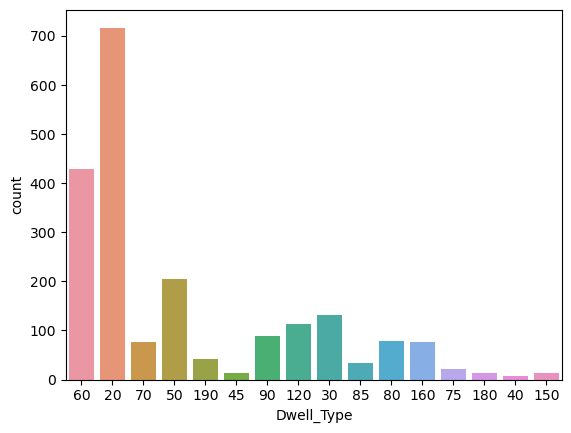

In [24]:
uni_cat(data=df_cat,x='Dwell_Type')

no of unique categories:['RL' 'RM' 'C (all)' 'FV' 'RH']

unique categories count:5

Value count and their proportion
             count  proportion
Zone_Class                   
RL           1602    0.777670
RM            323    0.156796
FV            100    0.048544
RH             21    0.010194
C (all)        14    0.006796


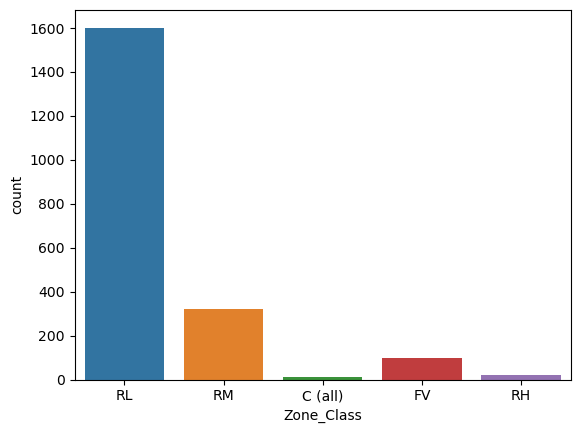

In [25]:
uni_cat(data=df_cat,x='Zone_Class')

no of unique categories:['Pave' 'Grvl']

unique categories count:2

Value count and their proportion
            count  proportion
Road_Type                   
Pave        2050    0.995146
Grvl          10    0.004854


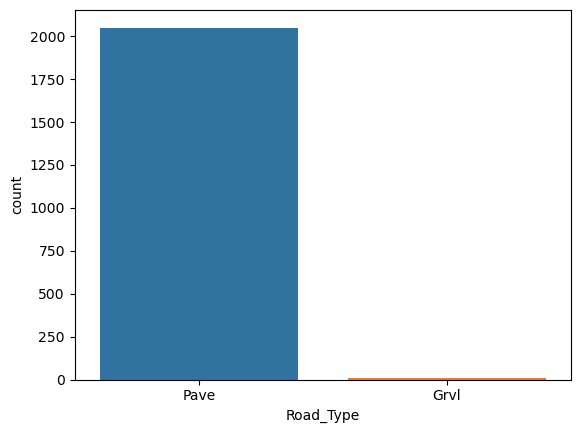

In [26]:
uni_cat(data=df_cat,x='Road_Type')

no of unique categories:[nan 'Grvl' 'Pave']

unique categories count:2

Value count and their proportion
        count  proportion
Alley                   
NaN     1932         NaN
Grvl      72      0.5625
Pave      56      0.4375


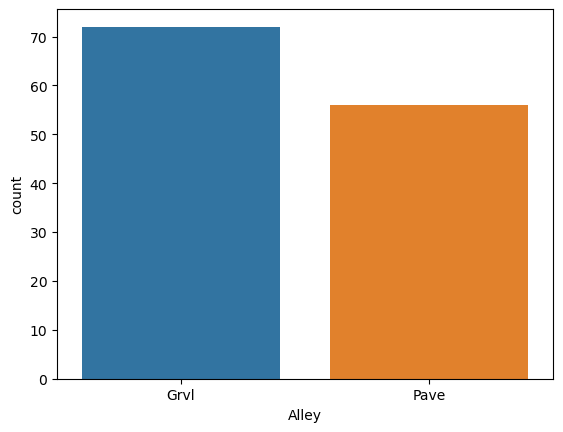

In [27]:
uni_cat(data=df_cat,x='Alley')

In [28]:
df_cat.drop('Alley',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\4263461617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('Alley',axis=1,inplace=True)


no of unique categories:['Reg' 'IR1' 'IR2' 'IR3']

unique categories count:4

Value count and their proportion
                 count  proportion
Property_Shape                   
Reg              1290    0.626214
IR1               696    0.337864
IR2                59    0.028641
IR3                15    0.007282


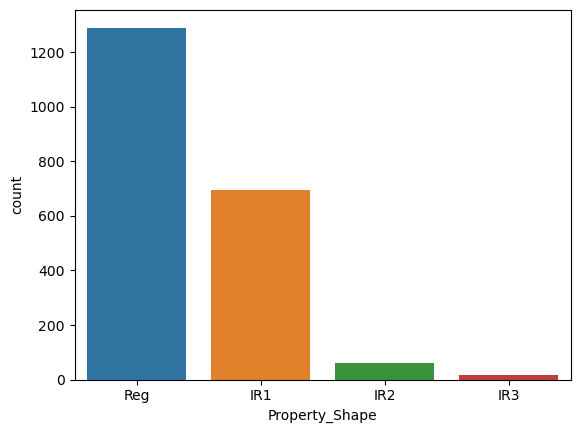

In [29]:
uni_cat(data=df_cat,x='Property_Shape')

In [30]:
df_cat['Property_Shape'].replace({"IR3":"IR2"},inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\2581359317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Property_Shape'].replace({"IR3":"IR2"},inplace=True)


no of unique categories:['Reg' 'IR1' 'IR2']

unique categories count:3

Value count and their proportion
                 count  proportion
Property_Shape                   
Reg              1290    0.626214
IR1               696    0.337864
IR2                74    0.035922


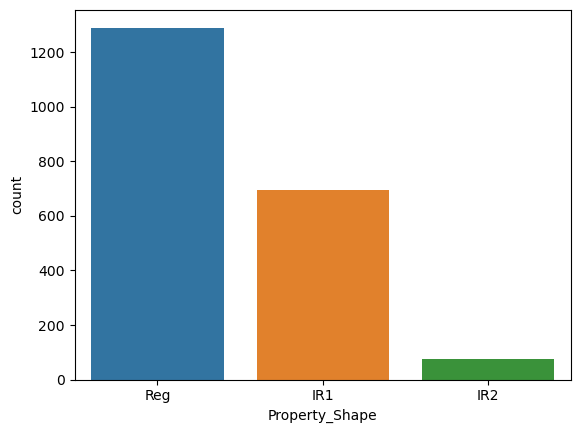

In [31]:
uni_cat(data=df_cat,x='Property_Shape')

no of unique categories:['Lvl' 'Bnk' 'Low' 'HLS']

unique categories count:4

Value count and their proportion
              count  proportion
LandContour                   
Lvl           1843    0.894660
Bnk             91    0.044175
HLS             75    0.036408
Low             51    0.024757


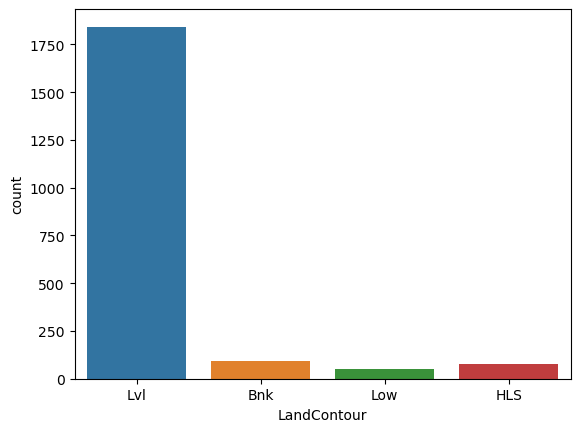

In [32]:
uni_cat(data=df_cat,x='LandContour')

no of unique categories:['AllPub' 'NoSeWa']

unique categories count:2

Value count and their proportion
            count  proportion
Utilities                   
AllPub      2057    0.998544
NoSeWa         3    0.001456


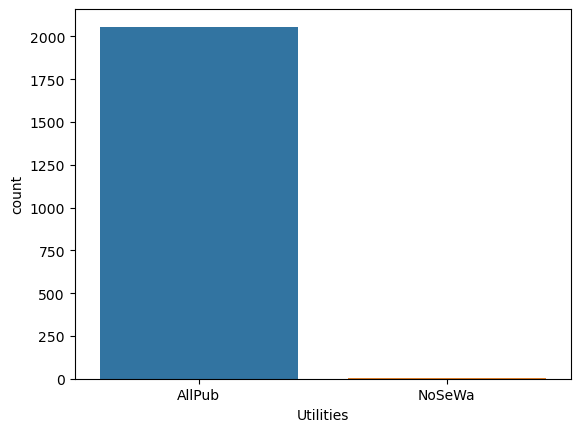

In [33]:
uni_cat(data=df_cat,x='Utilities')

In [34]:
df_cat.drop('Utilities',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\1052092174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('Utilities',axis=1,inplace=True)


no of unique categories:['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

unique categories count:5

Value count and their proportion
            count  proportion
LotConfig                   
Inside      1470    0.713592
Corner       385    0.186893
CulDSac      136    0.066019
FR2           65    0.031553
FR3            4    0.001942


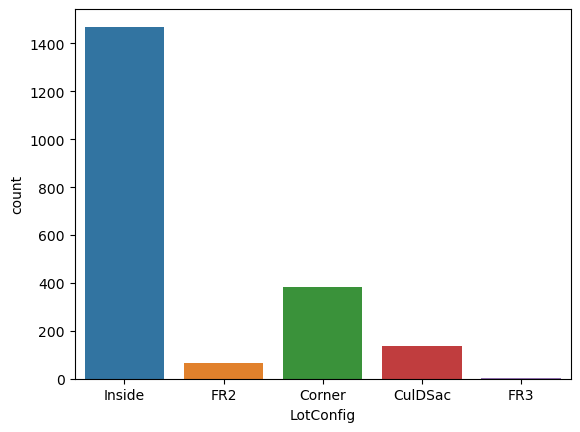

In [35]:
uni_cat(data=df_cat,x='LotConfig')

In [36]:
df_cat['LotConfig'].replace('FR3','FR2',inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\2608869913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['LotConfig'].replace('FR3','FR2',inplace=True)


no of unique categories:['Inside' 'FR2' 'Corner' 'CulDSac']

unique categories count:4

Value count and their proportion
            count  proportion
LotConfig                   
Inside      1470    0.713592
Corner       385    0.186893
CulDSac      136    0.066019
FR2           69    0.033495


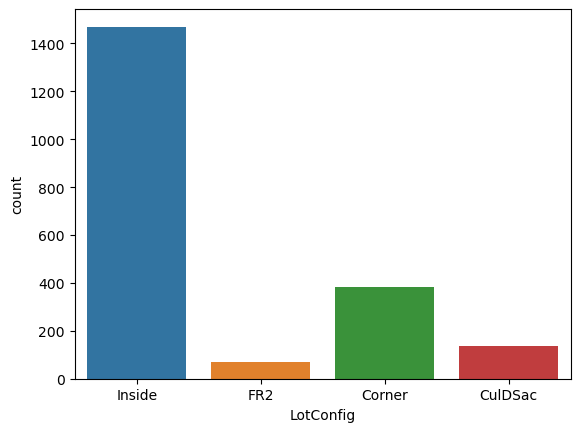

In [37]:
uni_cat(data=df_cat,x='LotConfig')

no of unique categories:['Gtl' 'Mod' 'Sev']

unique categories count:3

Value count and their proportion
            count  proportion
LandSlope                   
Gtl         1946    0.944660
Mod          100    0.048544
Sev           14    0.006796


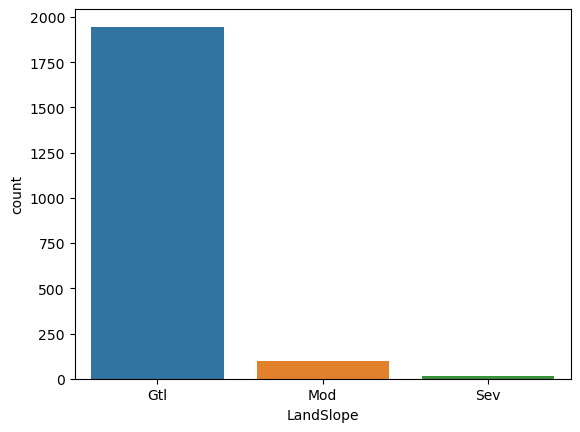

In [38]:
uni_cat(data=df_cat,x='LandSlope')

In [39]:
df_cat['LandSlope'].replace('Sev','Mod',inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\1878327549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['LandSlope'].replace('Sev','Mod',inplace=True)


no of unique categories:['Gtl' 'Mod']

unique categories count:2

Value count and their proportion
            count  proportion
LandSlope                   
Gtl         1946     0.94466
Mod          114     0.05534


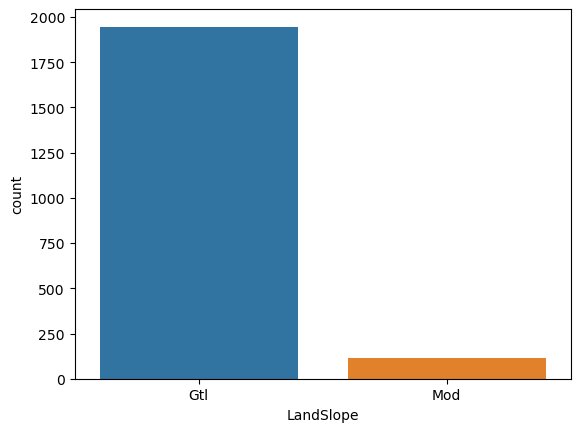

In [40]:
uni_cat(data=df_cat,x='LandSlope')

no of unique categories:['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

unique categories count:25

Value count and their proportion
               count  proportion
Neighborhood                   
NAmes           315    0.152913
CollgCr         215    0.104369
OldTown         156    0.075728
Edwards         137    0.066505
Somerst         121    0.058738
Gilbert         117    0.056796
Sawyer          107    0.051942
NWAmes          105    0.050971
NridgHt          99    0.048058
SawyerW          92    0.044660
BrkSide          79    0.038350
Mitchel          78    0.037864
Crawfor          71    0.034466
NoRidge          65    0.031553
Timber           53    0.025728
IDOTRR           51    0.024757
ClearCr          33    0.016019
StoneBr          32    0.015534
SWISU            31    0.01

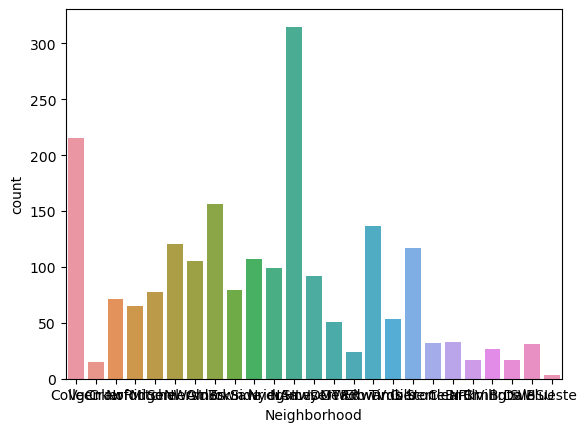

In [41]:
uni_cat(data=df_cat,x='Neighborhood')

no of unique categories:['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

unique categories count:9

Value count and their proportion
             count  proportion
Condition1                   
Norm         1782    0.865049
Feedr         111    0.053883
Artery         62    0.030097
RRAn           39    0.018932
PosN           24    0.011650
RRAe           15    0.007282
PosA           13    0.006311
RRNn           12    0.005825
RRNe            2    0.000971


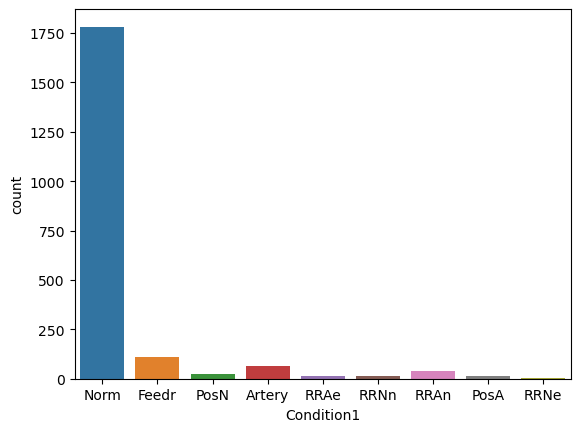

In [42]:
uni_cat(data=df_cat,x='Condition1')

no of unique categories:['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

unique categories count:8

Value count and their proportion
             count  proportion
Condition2                   
Norm         2041    0.990777
Feedr           9    0.004369
Artery          2    0.000971
RRNn            2    0.000971
PosN            2    0.000971
RRAn            2    0.000971
PosA            1    0.000485
RRAe            1    0.000485


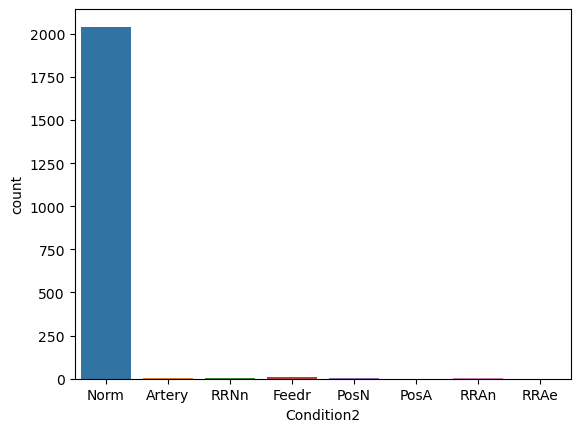

In [43]:
uni_cat(data=df_cat,x='Condition2')

In [44]:
df_cat.drop('Condition2',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\2272283673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('Condition2',axis=1,inplace=True)


no of unique categories:['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

unique categories count:5

Value count and their proportion
                count  proportion
Dwelling_Type                   
1Fam            1710    0.830097
TwnhsE           167    0.081068
Duplex            84    0.040777
Twnhs             55    0.026699
2fmCon            44    0.021359


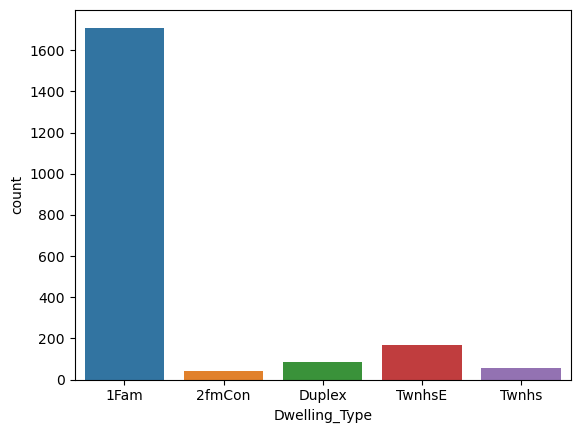

In [45]:
uni_cat(data=df_cat,x='Dwelling_Type')

no of unique categories:['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

unique categories count:8

Value count and their proportion
             count  proportion
HouseStyle                   
1Story       1029    0.499515
2Story        632    0.306796
1.5Fin        214    0.103883
SLvl           89    0.043204
SFoyer         54    0.026214
1.5Unf         16    0.007767
2.5Unf         16    0.007767
2.5Fin         10    0.004854


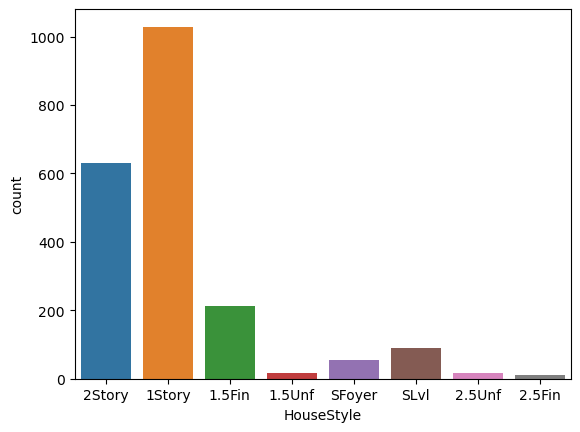

In [46]:
uni_cat(data=df_cat,x='HouseStyle')

In [47]:
df_cat['OverallQual'] = df['OverallQual']
df_cat['OverallCond'] = df['OverallCond']

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3950826242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['OverallQual'] = df['OverallQual']
C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3950826242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['OverallCond'] = df['OverallCond']


In [48]:
ct4 = pd.crosstab(df_cat['OverallQual'],df_cat['OverallCond'])
chi2_contingency(ct4)

Chi2ContingencyResult(statistic=1632.406028595157, pvalue=2.787715016642701e-293, dof=72, expected_freq=array([[9.70873786e-04, 4.85436893e-03, 2.52427184e-02, 1.42718447e-01,
        9.07766990e-01, 3.37864078e-01, 3.03883495e-01, 1.66990291e-01,
        1.09708738e-01],
       [1.94174757e-03, 9.70873786e-03, 5.04854369e-02, 2.85436893e-01,
        1.81553398e+00, 6.75728155e-01, 6.07766990e-01, 3.33980583e-01,
        2.19417476e-01],
       [9.70873786e-03, 4.85436893e-02, 2.52427184e-01, 1.42718447e+00,
        9.07766990e+00, 3.37864078e+00, 3.03883495e+00, 1.66990291e+00,
        1.09708738e+00],
       [1.03398058e-01, 5.16990291e-01, 2.68834951e+00, 1.51995146e+01,
        9.66771845e+01, 3.59825243e+01, 3.23635922e+01, 1.77844660e+01,
        1.16839806e+01],
       [2.43203883e-01, 1.21601942e+00, 6.32330097e+00, 3.57509709e+01,
        2.27395631e+02, 8.46349515e+01, 7.61228155e+01, 4.18310680e+01,
        2.74820388e+01],
       [2.23786408e-01, 1.11893204e+00, 5.81844660e

no of unique categories:[ 7  6  8  5  9  4 10  3  1  2]

unique categories count:10

Value count and their proportion
              count  proportion
OverallQual                   
5              501    0.243204
6              461    0.223786
7              413    0.200485
8              265    0.128641
4              213    0.103398
9              164    0.079612
3               20    0.009709
10              17    0.008252
2                4    0.001942
1                2    0.000971


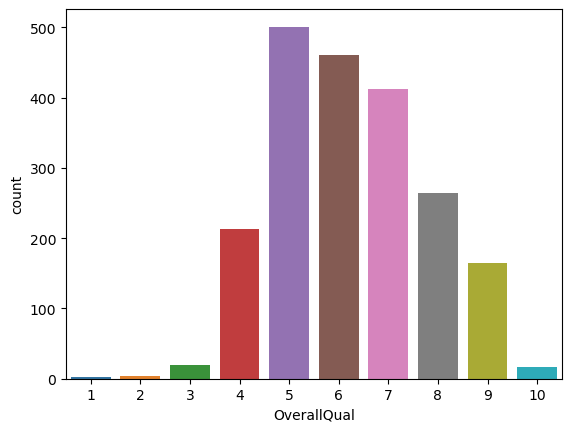

In [49]:
uni_cat(data=df_cat,x='OverallQual')

no of unique categories:[5 8 6 7 4 2 3 9 1]

unique categories count:9

Value count and their proportion
              count  proportion
OverallCond                   
5              935    0.453883
6              348    0.168932
7              313    0.151942
8              172    0.083495
4              147    0.071359
9              113    0.054854
3               26    0.012621
2                5    0.002427
1                1    0.000485


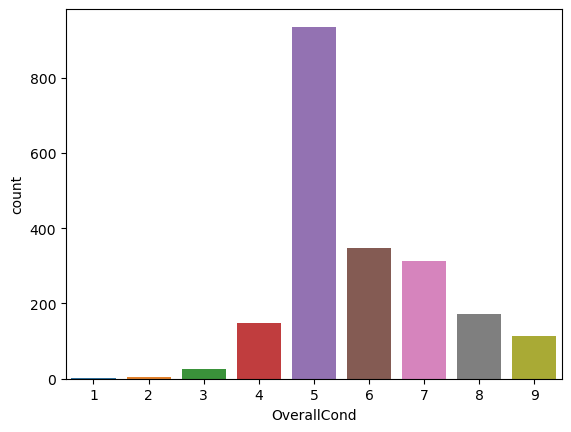

In [50]:
uni_cat(data=df_cat,x='OverallCond')

In [51]:
df_cat.drop(columns=['OverallCond'],axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\550446551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop(columns=['OverallCond'],axis=1,inplace=True)


no of unique categories:['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

unique categories count:6

Value count and their proportion
            count  proportion
RoofStyle                   
Gable       1593    0.773301
Hip          420    0.203883
Flat          19    0.009223
Gambrel       15    0.007282
Mansard       11    0.005340
Shed           2    0.000971


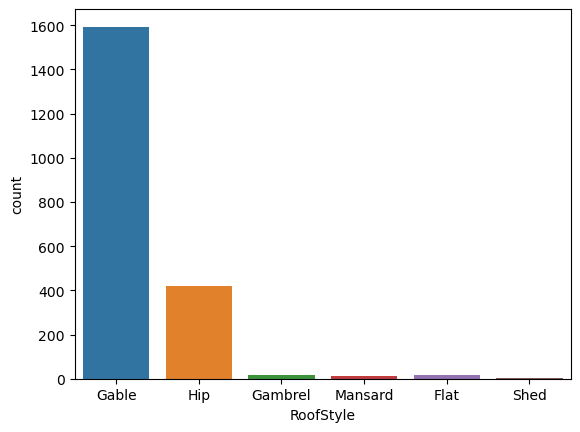

In [52]:
uni_cat(data=df_cat,x='RoofStyle')

no of unique categories:['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']

unique categories count:8

Value count and their proportion
           count  proportion
RoofMatl                   
CompShg    2023    0.982039
Tar&Grv      17    0.008252
WdShngl      10    0.004854
WdShake       6    0.002913
Metal         1    0.000485
Membran       1    0.000485
Roll          1    0.000485
ClyTile       1    0.000485


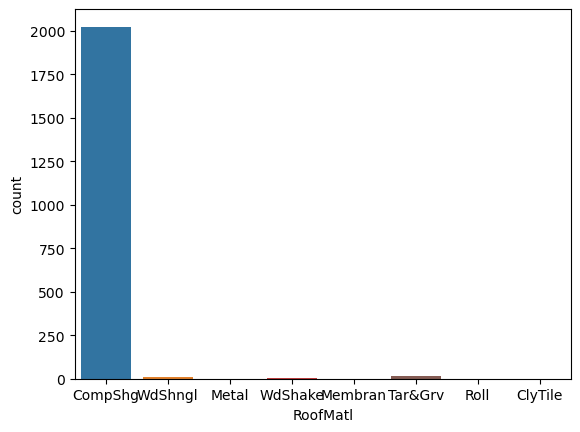

In [53]:
 uni_cat(data=df_cat,x='RoofMatl')

In [54]:
df_cat.drop('RoofMatl',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3724708222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('RoofMatl',axis=1,inplace=True)


In [55]:
df_cat.drop('Exterior2nd',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\2374949846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('Exterior2nd',axis=1,inplace=True)


no of unique categories:['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

unique categories count:15

Value count and their proportion
              count  proportion
Exterior1st                   
VinylSd        744    0.361165
HdBoard        313    0.151942
MetalSd        305    0.148058
Wd Sdng        285    0.138350
Plywood        155    0.075243
CemntBd         87    0.042233
BrkFace         72    0.034951
WdShing         37    0.017961
Stucco          28    0.013592
AsbShng         24    0.011650
BrkComm          3    0.001456
Stone            3    0.001456
AsphShn          2    0.000971
ImStucc          1    0.000485
CBlock           1    0.000485


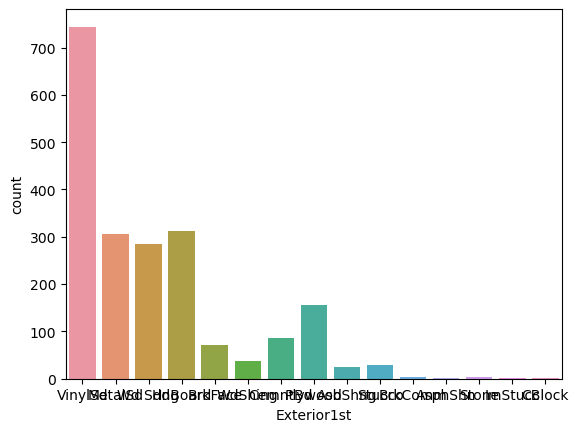

In [56]:
 uni_cat(data=df_cat,x='Exterior1st')

In [57]:
df_cat['Exterior1st'].replace({'BrkComm':'Others','Stone':'Others','Asphshn':'Others','ImStucc':'Others','CBlock':'Others'},inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\678225303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Exterior1st'].replace({'BrkComm':'Others','Stone':'Others','Asphshn':'Others','ImStucc':'Others','CBlock':'Others'},inplace=True)


In [58]:
df_cat['Exterior1st'].replace({'AsphShn':'Others'},inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3465869543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Exterior1st'].replace({'AsphShn':'Others'},inplace=True)


no of unique categories:['BrkFace' nan 'Stone' 'BrkCmn']

unique categories count:3

Value count and their proportion
             count  proportion
MasVnrType                   
NaN          1239         NaN
BrkFace       618    0.752741
Stone         183    0.222899
BrkCmn         20    0.024361


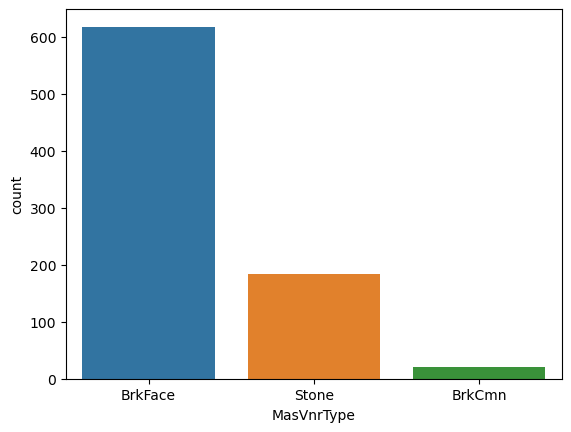

In [59]:
 uni_cat(data=df_cat,x='MasVnrType')

In [60]:
df_cat.drop('MasVnrType',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3250881305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('MasVnrType',axis=1,inplace=True)


In [61]:
df_cat.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Property_Shape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallQual'],
      dtype='object')

In [62]:
ct5 = pd.crosstab(df_cat['ExterQual'],df_cat['ExterCond'])
chi2_contingency(ct5)

Chi2ContingencyResult(statistic=173.38084913141017, pvalue=9.704746758570593e-31, dof=12, expected_freq=array([[1.10679612e-01, 1.29126214e+00, 8.07961165e+00, 3.68932039e-02,
        6.64815534e+01],
       [2.76699029e-02, 3.22815534e-01, 2.01990291e+00, 9.22330097e-03,
        1.66203883e+01],
       [1.02087379e+00, 1.19101942e+01, 7.45237864e+01, 3.40291262e-01,
        6.13204854e+02],
       [1.84077670e+00, 2.14757282e+01, 1.34376699e+02, 6.13592233e-01,
        1.10569320e+03]]))

no of unique categories:['TA' 'Gd' 'Fa' 'Po' 'Ex']

unique categories count:5

Value count and their proportion
            count  proportion
ExterCond                   
TA          1802    0.874757
Gd           219    0.106311
Fa            35    0.016990
Ex             3    0.001456
Po             1    0.000485


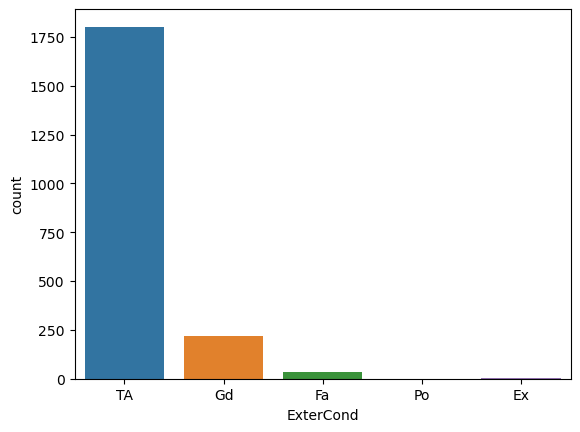

In [63]:
 uni_cat(data=df_cat,x='ExterCond')

no of unique categories:['Gd' 'TA' 'Ex' 'Fa']

unique categories count:4

Value count and their proportion
            count  proportion
ExterQual                   
TA          1264    0.613592
Gd           701    0.340291
Ex            76    0.036893
Fa            19    0.009223


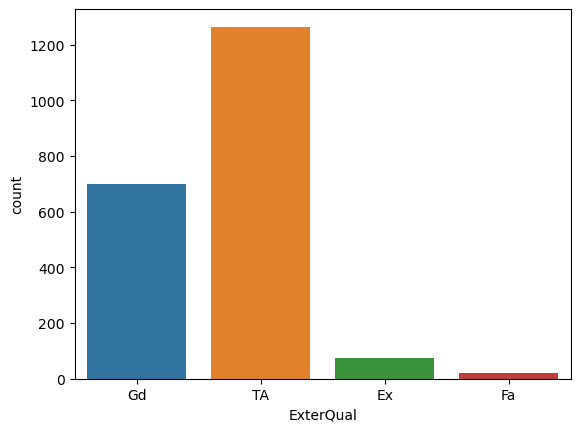

In [64]:
 uni_cat(data=df_cat,x='ExterQual')

In [65]:
df_cat.drop('ExterCond',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\429976676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('ExterCond',axis=1,inplace=True)


no of unique categories:['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']

unique categories count:6

Value count and their proportion
             count  proportion
Foundation                   
PConc         923    0.448058
CBlock        895    0.434466
BrkTil        190    0.092233
Slab           39    0.018932
Stone          10    0.004854
Wood            3    0.001456


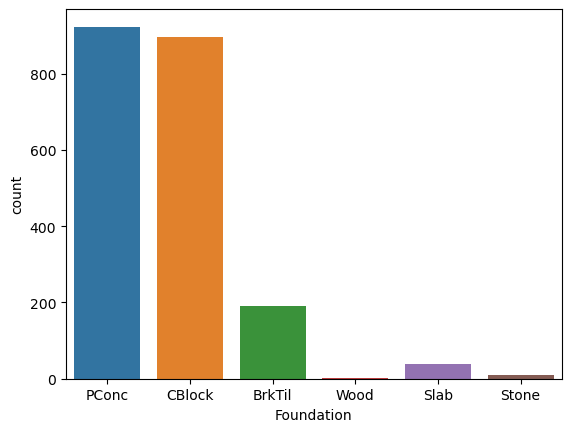

In [66]:
 uni_cat(data=df_cat,x='Foundation')

no of unique categories:['Gd' 'TA' 'Ex' nan 'Fa']

unique categories count:4

Value count and their proportion
           count  proportion
BsmtQual                   
Gd          898    0.448551
TA          885    0.442058
Ex          169    0.084416
NaN          58         NaN
Fa           50    0.024975


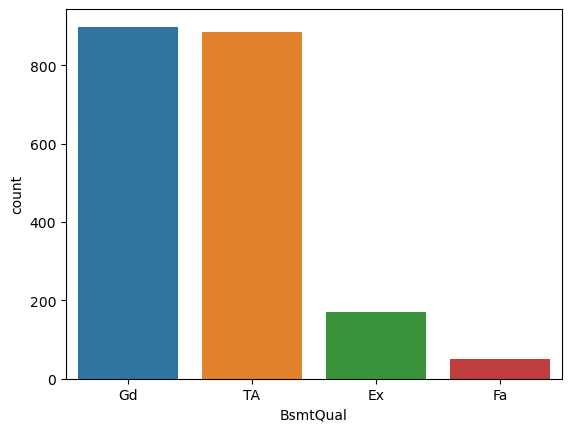

In [67]:
 uni_cat(data=df_cat,x='BsmtQual')

no of unique categories:['TA' 'Gd' nan 'Fa' 'Po']

unique categories count:4

Value count and their proportion
           count  proportion
BsmtCond                   
TA         1841    0.919580
Gd           98    0.048951
Fa           61    0.030470
NaN          58         NaN
Po            2    0.000999


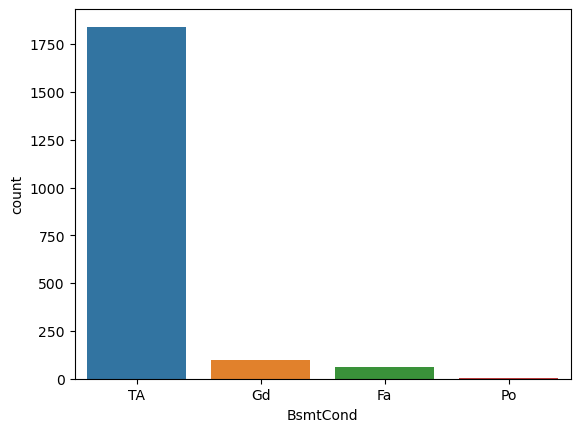

In [68]:
 uni_cat(data=df_cat,x='BsmtCond')

In [69]:
ct6 = pd.crosstab(df_cat['BsmtQual'],df_cat['BsmtCond'])
chi2_contingency(ct6)

Chi2ContingencyResult(statistic=211.36994742622664, pvalue=1.3629650295032247e-40, dof=9, expected_freq=array([[5.14935065e+00, 8.27272727e+00, 1.68831169e-01, 1.55409091e+02],
       [1.52347652e+00, 2.44755245e+00, 4.99500500e-02, 4.59790210e+01],
       [2.73616384e+01, 4.39580420e+01, 8.97102897e-01, 8.25783217e+02],
       [2.69655345e+01, 4.33216783e+01, 8.84115884e-01, 8.13828671e+02]]))

In [70]:
df_cat.drop('BsmtCond',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\1495908738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('BsmtCond',axis=1,inplace=True)


In [71]:
df_cat['BsmtQual'].replace({np.nan:'Others'},inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\4146336629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['BsmtQual'].replace({np.nan:'Others'},inplace=True)


no of unique categories:['Gd' 'TA' 'Ex' 'Others' 'Fa']

unique categories count:5

Value count and their proportion
           count  proportion
BsmtQual                   
Gd          898    0.435922
TA          885    0.429612
Ex          169    0.082039
Others       58    0.028155
Fa           50    0.024272


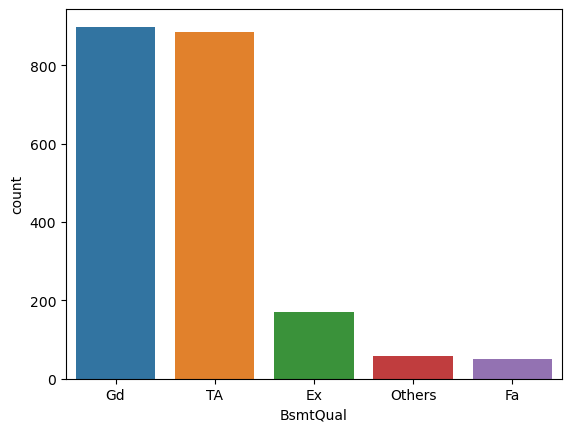

In [72]:
 uni_cat(data=df_cat,x='BsmtQual')

no of unique categories:['No' 'Gd' 'Mn' 'Av' nan]

unique categories count:4

Value count and their proportion
               count  proportion
BsmtExposure                   
No             1340      0.6700
Av              319      0.1595
Gd              181      0.0905
Mn              160      0.0800
NaN              60         NaN


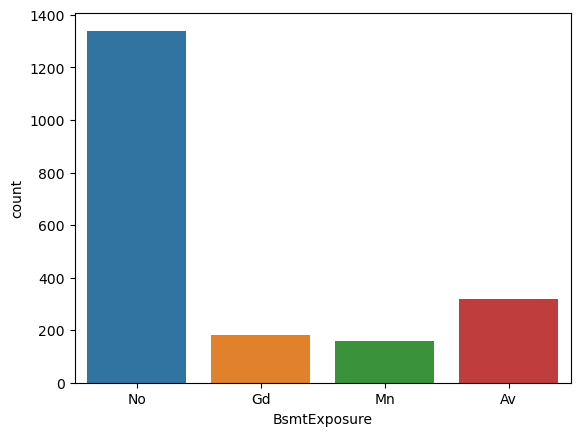

In [73]:
 uni_cat(data=df_cat,x='BsmtExposure')

In [74]:
df_cat.replace({np.nan:'NoB'},inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3677309655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({np.nan:'NoB'},inplace=True)


no of unique categories:['No' 'Gd' 'Mn' 'Av' 'NoB']

unique categories count:5

Value count and their proportion
               count  proportion
BsmtExposure                   
No             1340    0.650485
Av              319    0.154854
Gd              181    0.087864
Mn              160    0.077670
NoB              60    0.029126


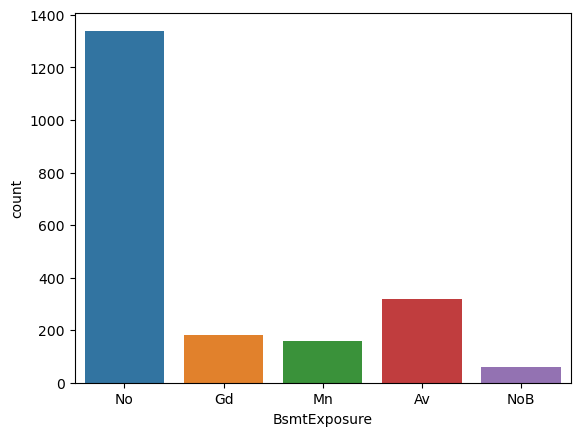

In [75]:
 uni_cat(data=df_cat,x='BsmtExposure')

no of unique categories:['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NoB' 'LwQ']

unique categories count:7

Value count and their proportion
               count  proportion
BsmtFinType1                   
Unf             601    0.291748
GLQ             596    0.289320
ALQ             317    0.153883
BLQ             209    0.101456
Rec             170    0.082524
LwQ             109    0.052913
NoB              58    0.028155


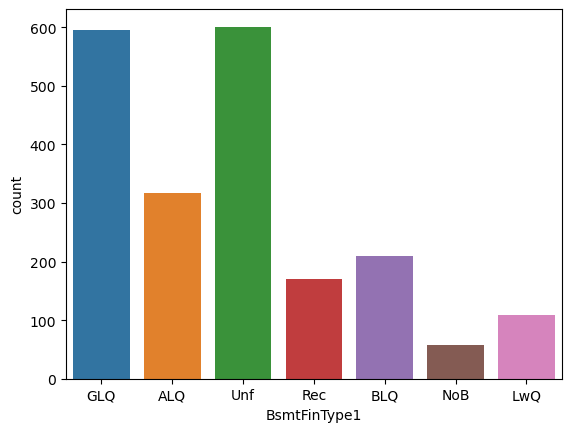

In [76]:
 uni_cat(data=df_cat,x='BsmtFinType1')

no of unique categories:['Unf' 'BLQ' 'NoB' 'ALQ' 'Rec' 'LwQ' 'GLQ']

unique categories count:7

Value count and their proportion
               count  proportion
BsmtFinType2                   
Unf            1759    0.853883
Rec              79    0.038350
LwQ              67    0.032524
NoB              59    0.028641
BLQ              50    0.024272
ALQ              24    0.011650
GLQ              22    0.010680


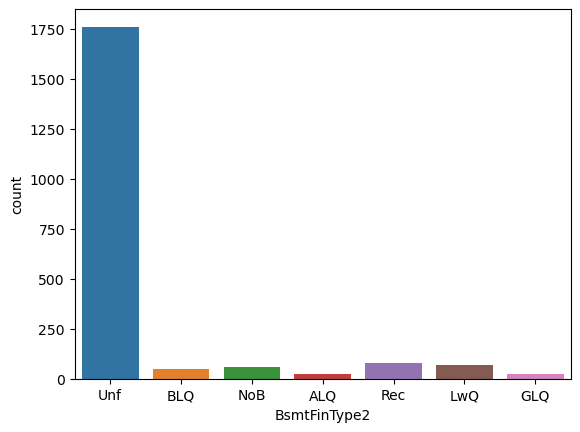

In [77]:
 uni_cat(data=df_cat,x='BsmtFinType2')

In [78]:
ct7 = pd.crosstab(df_cat['BsmtFinType1'],df_cat['BsmtFinType2'])
chi2_contingency(ct7)

Chi2ContingencyResult(statistic=2556.010830801958, pvalue=0.0, dof=36, expected_freq=array([[  3.69320388,   7.69417476,   3.38543689,  10.31019417,
          9.07912621,  12.15679612, 270.68106796],
       [  2.43495146,   5.07281553,   2.23203883,   6.79757282,
          5.98592233,   8.01504854, 178.46165049],
       [  6.94368932,  14.46601942,   6.36504854,  19.38446602,
         17.06990291,  22.85631068, 508.91456311],
       [  1.26990291,   2.64563107,   1.16407767,   3.54514563,
          3.12184466,   4.18009709,  93.07330097],
       [  0.67572816,   1.40776699,   0.61941748,   1.88640777,
          1.66116505,   2.22427184,  49.52524272],
       [  1.98058252,   4.12621359,   1.81553398,   5.52912621,
          4.86893204,   6.51941748, 145.16019417],
       [  7.00194175,  14.58737864,   6.4184466 ,  19.54708738,
         17.2131068 ,  23.04805825, 513.18398058]]))

In [79]:
df_cat.drop('BsmtFinType2',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\696171126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('BsmtFinType2',axis=1,inplace=True)


no of unique categories:['Ex' 'Gd' 'TA' 'Fa' 'Po']

unique categories count:5

Value count and their proportion
            count  proportion
HeatingQC                   
Ex          1039    0.504369
TA           611    0.296602
Gd           341    0.165534
Fa            68    0.033010
Po             1    0.000485


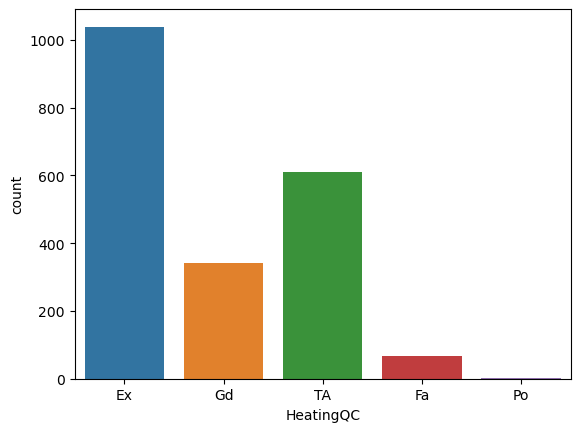

In [80]:
 uni_cat(data=df_cat,x='HeatingQC')

no of unique categories:['Y' 'N']

unique categories count:2

Value count and their proportion
             count  proportion
CentralAir                   
Y            1924    0.933981
N             136    0.066019


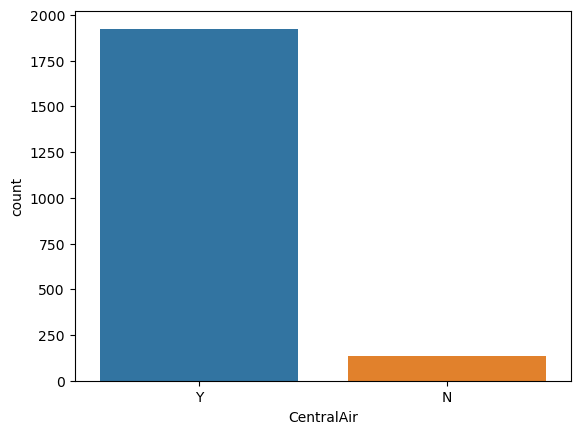

In [81]:
 uni_cat(data=df_cat,x='CentralAir')

no of unique categories:['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'NoB']

unique categories count:6

Value count and their proportion
             count  proportion
Electrical                   
SBrkr        1891    0.917961
FuseA         124    0.060194
FuseF          40    0.019417
FuseP           3    0.001456
Mix             1    0.000485
NoB             1    0.000485


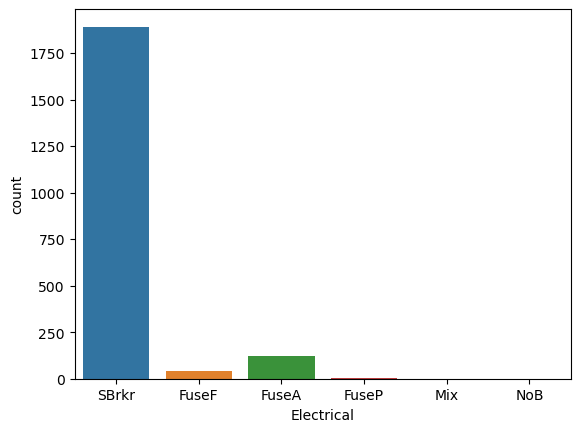

In [82]:
 uni_cat(data=df_cat,x='Electrical')

In [83]:
df_cat['Electrical'].replace({'FuseP':'FuseF','Mix':'FuseF','NoB':'FuseF'},inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\921037501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Electrical'].replace({'FuseP':'FuseF','Mix':'FuseF','NoB':'FuseF'},inplace=True)


no of unique categories:['SBrkr' 'FuseF' 'FuseA']

unique categories count:3

Value count and their proportion
             count  proportion
Electrical                   
SBrkr        1891    0.917961
FuseA         124    0.060194
FuseF          45    0.021845


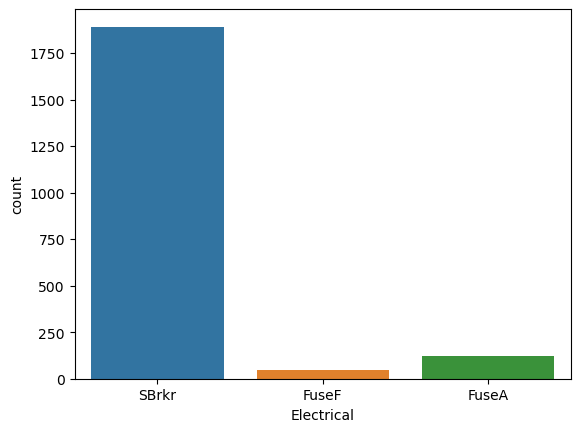

In [84]:
 uni_cat(data=df_cat,x='Electrical')

no of unique categories:['Gd' 'TA' 'Ex' 'Fa']

unique categories count:4

Value count and their proportion
              count  proportion
KitchenQual                   
TA            1036    0.502913
Gd             832    0.403883
Ex             144    0.069903
Fa              48    0.023301


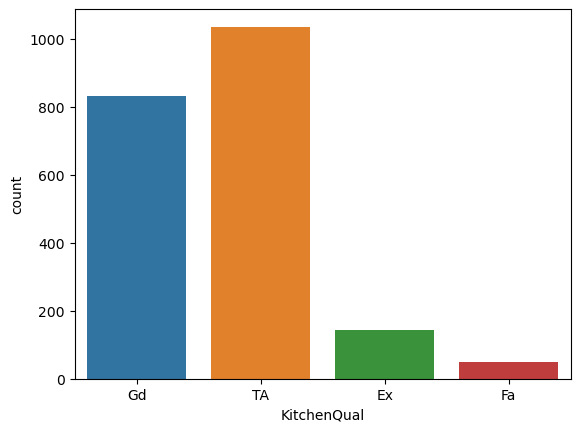

In [85]:
uni_cat(data=df_cat,x='KitchenQual')

no of unique categories:['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']

unique categories count:7

Value count and their proportion
             count  proportion
Functional                   
Typ          1925    0.934466
Min1           48    0.023301
Min2           47    0.022816
Mod            18    0.008738
Maj1           15    0.007282
Maj2            6    0.002913
Sev             1    0.000485


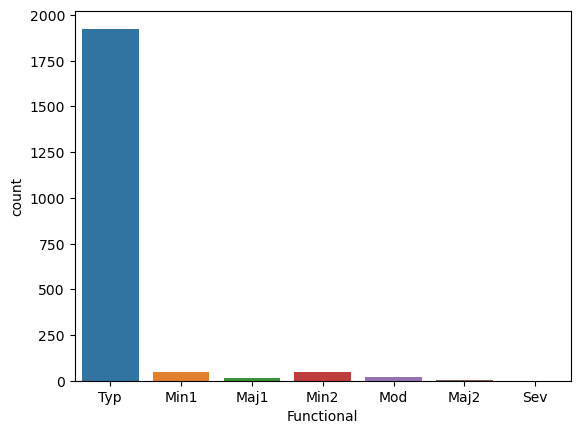

In [86]:
uni_cat(data=df_cat,x='Functional')

no of unique categories:['NoB' 'TA' 'Gd' 'Fa' 'Ex' 'Po']

unique categories count:6

Value count and their proportion
              count  proportion
FireplaceQu                   
NoB            977    0.474272
Gd             528    0.256311
TA             457    0.221845
Fa              40    0.019417
Ex              33    0.016019
Po              25    0.012136


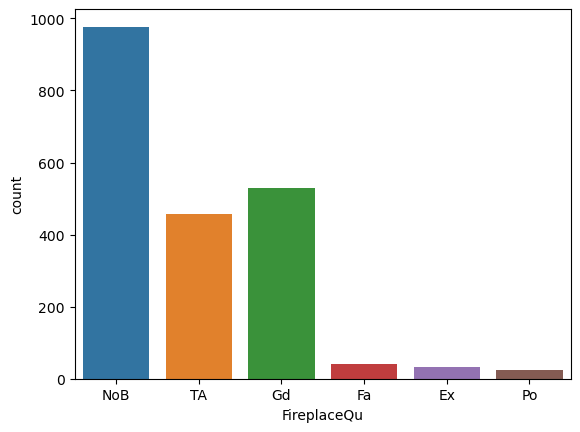

In [87]:
uni_cat(data=df_cat,x='FireplaceQu')

no of unique categories:['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'NoB' 'Basment' '2Types']

unique categories count:7

Value count and their proportion
             count  proportion
GarageType                   
Attchd       1244    0.603883
Detchd        533    0.258738
BuiltIn       124    0.060194
NoB           113    0.054854
Basment        27    0.013107
CarPort        12    0.005825
2Types          7    0.003398


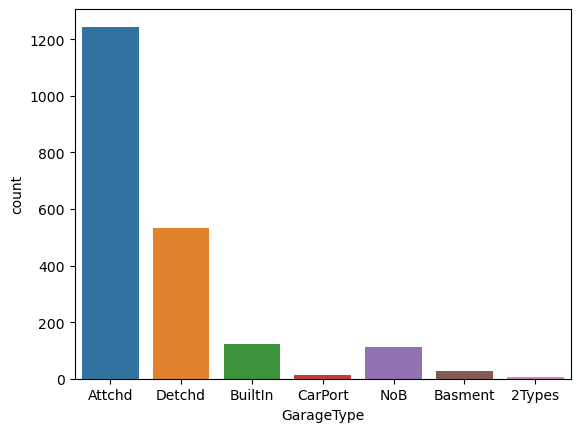

In [88]:
uni_cat(data=df_cat,x='GarageType')

In [89]:
df['age'] = 2023 - df['GarageYrBlt']

In [90]:
df.drop('GarageYrBlt',axis=1,inplace=True)

In [91]:
df['age'].fillna(df['age'].mean(),inplace=True)

no of unique categories:['RFn' 'Unf' 'Fin' 'NoB']

unique categories count:4

Value count and their proportion
               count  proportion
GarageFinish                   
Unf             851    0.413107
RFn             600    0.291262
Fin             496    0.240777
NoB             113    0.054854


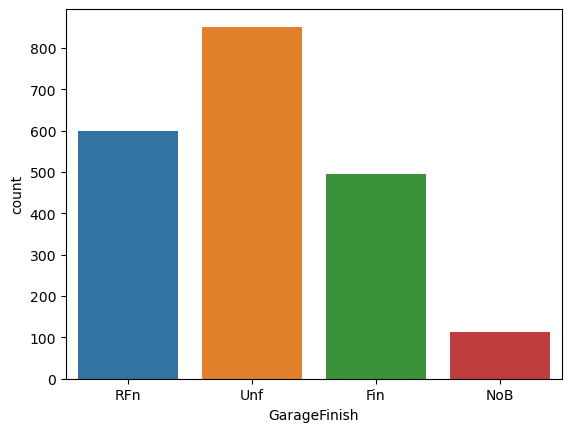

In [92]:
uni_cat(data=df_cat,x='GarageFinish')

In [93]:
ct8 = pd.crosstab(df_cat['GarageQual'],df_cat['GarageCond'])
chi2_contingency(ct8)

Chi2ContingencyResult(statistic=5258.052129276693, pvalue=0.0, dof=25, expected_freq=array([[5.82524272e-03, 9.12621359e-02, 3.30097087e-02, 2.19417476e-01,
        1.55339806e-02, 3.63495146e+00],
       [9.46601942e-02, 1.48300971e+00, 5.36407767e-01, 3.56553398e+00,
        2.52427184e-01, 5.90679612e+01],
       [2.62135922e-02, 4.10679612e-01, 1.48543689e-01, 9.87378641e-01,
        6.99029126e-02, 1.63572816e+01],
       [1.64563107e-01, 2.57815534e+00, 9.32524272e-01, 6.19854369e+00,
        4.38834951e-01, 1.02687379e+02],
       [4.36893204e-03, 6.84466019e-02, 2.47572816e-02, 1.64563107e-01,
        1.16504854e-02, 2.72621359e+00],
       [2.70436893e+00, 4.23684466e+01, 1.53247573e+01, 1.01864563e+02,
        7.21165049e+00, 1.68752621e+03]]))

no of unique categories:['TA' 'Fa' 'Gd' 'NoB' 'Ex' 'Po']

unique categories count:6

Value count and their proportion
             count  proportion
GarageQual                   
TA           1857    0.901456
NoB           113    0.054854
Fa             65    0.031553
Gd             18    0.008738
Ex              4    0.001942
Po              3    0.001456


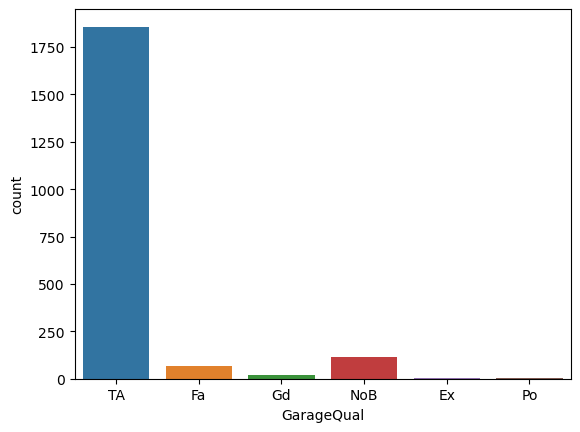

In [94]:
uni_cat(data=df_cat,x='GarageQual')

no of unique categories:['TA' 'Fa' 'NoB' 'Gd' 'Po' 'Ex']

unique categories count:6

Value count and their proportion
             count  proportion
GarageCond                   
TA           1872    0.908738
NoB           113    0.054854
Fa             47    0.022816
Gd             17    0.008252
Po              8    0.003883
Ex              3    0.001456


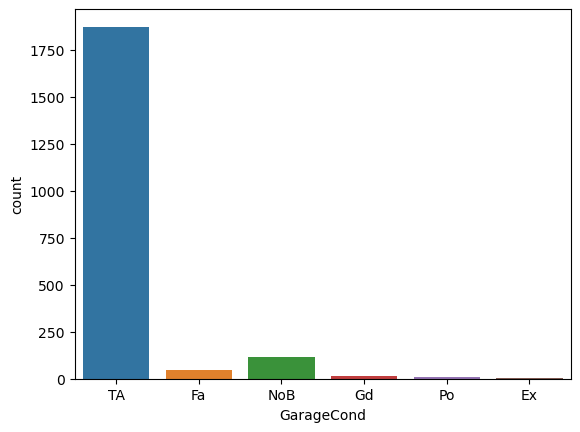

In [95]:
uni_cat(data=df_cat,x='GarageCond')

In [96]:
df_cat.drop('GarageCond',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\652447769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('GarageCond',axis=1,inplace=True)


no of unique categories:['Y' 'N' 'P']

unique categories count:3

Value count and their proportion
             count  proportion
PavedDrive                   
Y            1900    0.922330
N             116    0.056311
P              44    0.021359


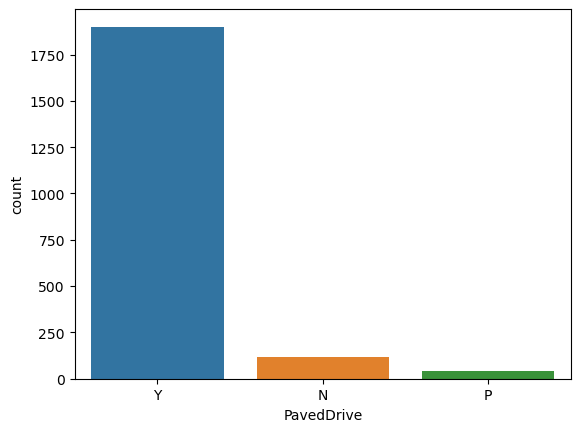

In [97]:
uni_cat(data=df_cat,x='PavedDrive')

no of unique categories:['NoB' 'Ex' 'Fa' 'Gd']

unique categories count:4

Value count and their proportion
         count  proportion
PoolQC                   
NoB      2052    0.996117
Gd          4    0.001942
Ex          2    0.000971
Fa          2    0.000971


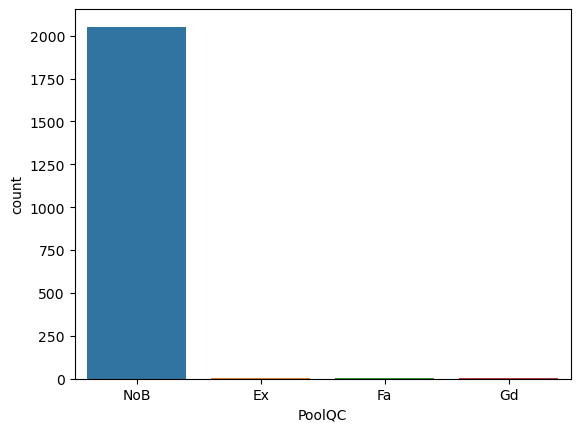

In [98]:
uni_cat(data=df_cat,x='PoolQC')

In [99]:
df_cat.drop('PoolQC',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\108166917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('PoolQC',axis=1,inplace=True)


no of unique categories:['NoB' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

unique categories count:5

Value count and their proportion
        count  proportion
Fence                   
NoB     1659    0.805340
MnPrv    230    0.111650
GdPrv     88    0.042718
GdWo      69    0.033495
MnWw      14    0.006796


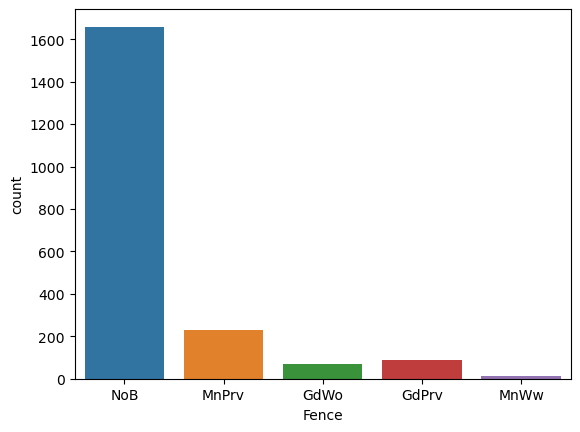

In [100]:
uni_cat(data=df_cat,x='Fence')

no of unique categories:['NoB' 'Shed' 'Gar2' 'Othr' 'TenC']

unique categories count:5

Value count and their proportion
              count  proportion
MiscFeature                   
NoB           1981    0.961650
Shed            73    0.035437
Othr             3    0.001456
Gar2             2    0.000971
TenC             1    0.000485


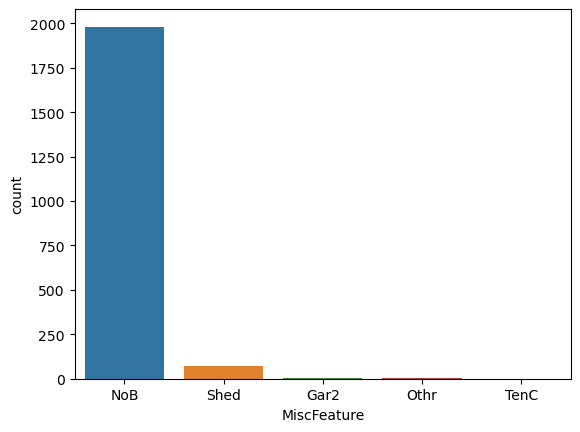

In [101]:
uni_cat(data=df_cat,x='MiscFeature')

In [102]:
df_cat.drop('MiscFeature',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\1583692148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.drop('MiscFeature',axis=1,inplace=True)


no of unique categories:[    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]

unique categories count:21

Value count and their proportion
          count  proportion
MiscVal                   
0         1984    0.963107
400         21    0.010194
500         11    0.005340
450          6    0.002913
700          6    0.002913
2000         5    0.002427
600          4    0.001942
480          3    0.001456
1200         3    0.001456
2500         3    0.001456
1300         2    0.000971
620          2    0.000971
560          2    0.000971
15500        1    0.000485
800          1    0.000485
350          1    0.000485
3500         1    0.000485
54           1    0.000485
1400         1    0.000485
8300         1    0.000485
1150         1    0.000485


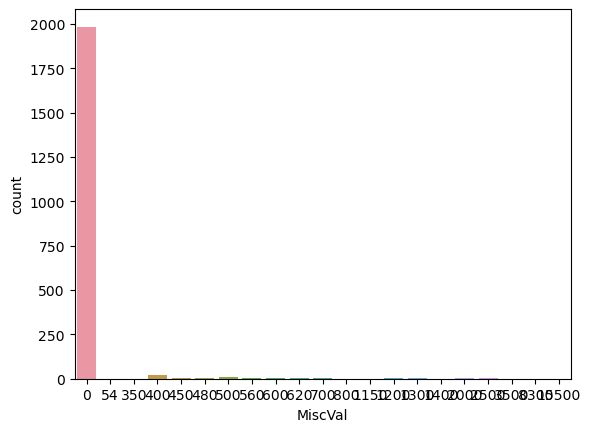

In [103]:
uni_cat(data=df,x='MiscVal')

In [104]:
df.drop('MiscVal',axis=1,inplace=True)

no of unique categories:[ 2  5  9 12 10  8 11  4  1  7  3  6]

unique categories count:12

Value count and their proportion
         count  proportion
MoSold                   
6         353    0.171359
7         322    0.156311
5         294    0.142718
4         200    0.097087
8         184    0.089320
3         140    0.067961
10        129    0.062621
11        111    0.053883
9          87    0.042233
1          84    0.040777
2          83    0.040291
12         73    0.035437


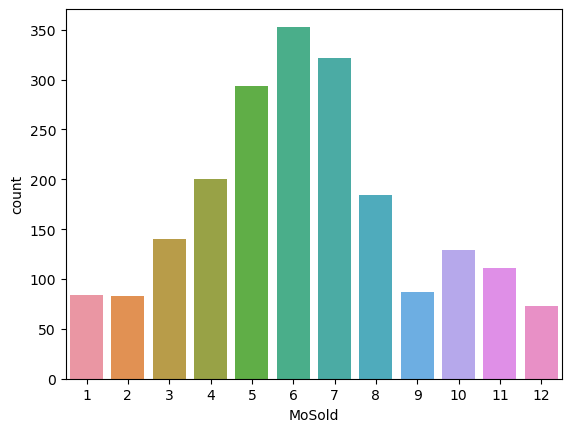

In [105]:
uni_cat(data=df,x='MoSold')

no of unique categories:[2008 2007 2006 2009 2010]

unique categories count:5

Value count and their proportion
         count  proportion
YrSold                   
2009      503    0.244175
2007      467    0.226699
2006      424    0.205825
2008      413    0.200485
2010      253    0.122816


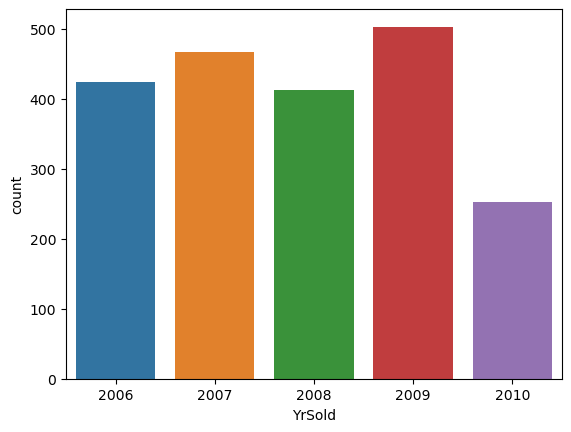

In [106]:
uni_cat(data=df,x='YrSold')

In [107]:
df['house_age'] = 2023 - df['YrSold']

no of unique categories:[15 16 17 14 13]

unique categories count:5

Value count and their proportion
            count  proportion
house_age                   
14           503    0.244175
16           467    0.226699
17           424    0.205825
15           413    0.200485
13           253    0.122816


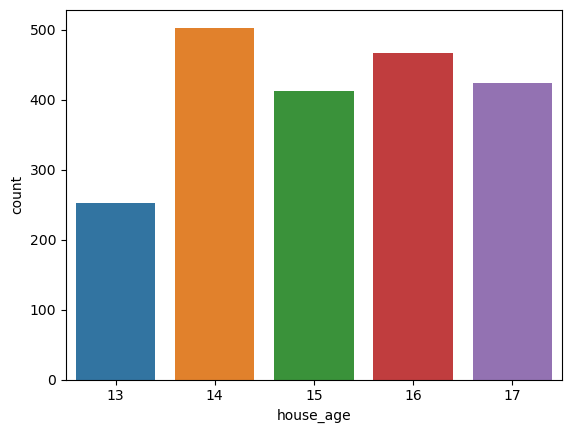

In [108]:
uni_cat(data=df,x='house_age')

In [109]:
df.drop('YrSold',axis=1,inplace=True)

In [110]:
df['MoSold'] = df['MoSold'].astype(str)

In [111]:
df_cat['MoSold'] = df['MoSold']

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3119747221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['MoSold'] = df['MoSold']


no of unique categories:['2' '5' '9' '12' '10' '8' '11' '4' '1' '7' '3' '6']

unique categories count:12

Value count and their proportion
         count  proportion
MoSold                   
6         353    0.171359
7         322    0.156311
5         294    0.142718
4         200    0.097087
8         184    0.089320
3         140    0.067961
10        129    0.062621
11        111    0.053883
9          87    0.042233
1          84    0.040777
2          83    0.040291
12         73    0.035437


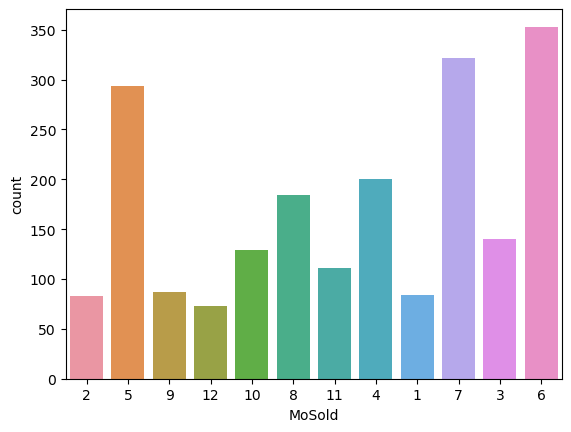

In [112]:
uni_cat(data=df_cat,x='MoSold')

no of unique categories:['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']

unique categories count:9

Value count and their proportion
           count  proportion
SaleType                   
WD         1787    0.867476
New         168    0.081553
COD          68    0.033010
ConLD        14    0.006796
ConLI         5    0.002427
CWD           5    0.002427
ConLw         5    0.002427
Oth           5    0.002427
Con           3    0.001456


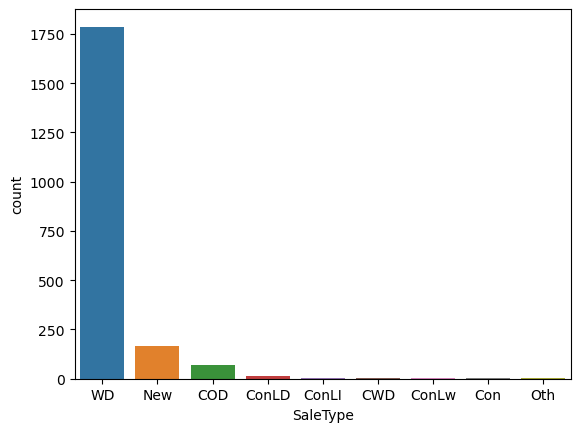

In [113]:
uni_cat(data=df_cat,x='SaleType')

In [114]:
df_cat['SaleType'].replace({'ConLI':'Oth','CWD':'Oth','ConLW':'Oth','Con':'Oth'},inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\2380126895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['SaleType'].replace({'ConLI':'Oth','CWD':'Oth','ConLW':'Oth','Con':'Oth'},inplace=True)


no of unique categories:['WD' 'New' 'COD' 'ConLD' 'Oth' 'ConLw']

unique categories count:6

Value count and their proportion
           count  proportion
SaleType                   
WD         1787    0.867476
New         168    0.081553
COD          68    0.033010
Oth          18    0.008738
ConLD        14    0.006796
ConLw         5    0.002427


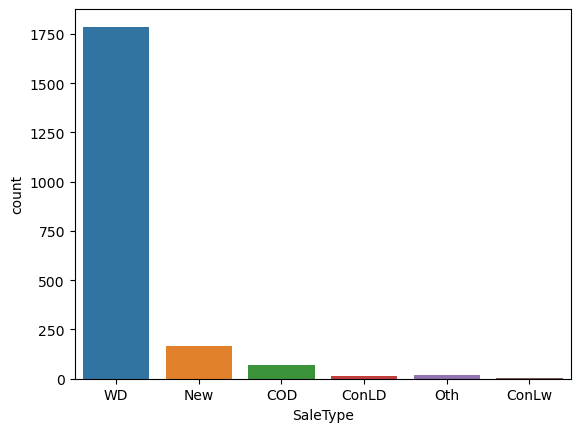

In [115]:
uni_cat(data=df_cat,x='SaleType')

no of unique categories:['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']

unique categories count:6

Value count and their proportion
                count  proportion
SaleCondition                   
Normal          1687    0.818932
Partial          172    0.083495
Abnorml          154    0.074757
Family            24    0.011650
Alloca            18    0.008738
AdjLand            5    0.002427


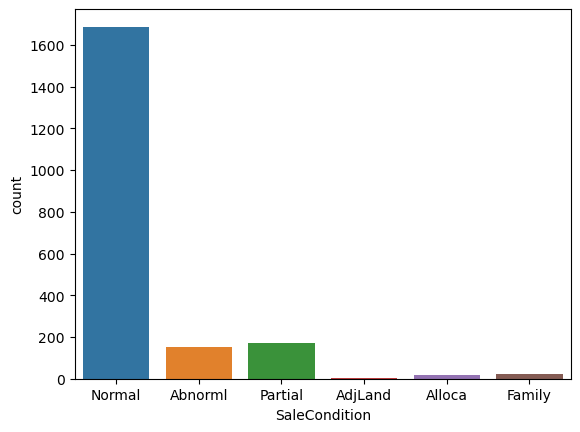

In [116]:
uni_cat(data=df_cat,x='SaleCondition')

In [117]:
df_cat.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Property_Shape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition', 'OverallQual', 'MoSold'],
      dtype='object')

In [118]:
df_cat1 = df_cat.copy()

In [119]:
df_cat = pd.get_dummies(df_cat,drop_first=True,dtype=int)

In [120]:
df_cat

,OverallQual,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_20,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,...,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9
0,7,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2069,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2070,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2071,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
df_num = df[df.dtypes[df.dtypes!=object].index]

In [155]:
df_num

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Property_Sale_Price,age,house_age
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,208500,20.000000,15
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,181500,47.000000,16
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,223500,22.000000,15
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,140000,25.000000,17
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,250000,23.000000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,NaN,8755,8,4,1936,1999,298.0,772,0,...,390,0,0,0,168,0,0,214000,24.000000,14
2069,943,63.0,7711,6,9,1936,1977,0.0,1440,0,...,0,321,0,0,0,0,0,150000,42.556754,16
2070,944,313.0,25000,4,6,1983,1996,0.0,0,0,...,576,0,0,0,0,0,0,143000,6.000000,16
2071,945,52.0,14375,9,6,1958,1958,541.0,111,354,...,525,0,118,0,0,233,0,137500,65.000000,14


In [156]:
df_num.drop('Id',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\1912161491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('Id',axis=1,inplace=True)


In [157]:
df_num

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Property_Sale_Price,age,house_age
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,208500,20.000000,15
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,181500,47.000000,16
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,223500,22.000000,15
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,140000,25.000000,17
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,250000,23.000000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,NaN,8755,8,4,1936,1999,298.0,772,0,220,...,390,0,0,0,168,0,0,214000,24.000000,14
2069,63.0,7711,6,9,1936,1977,0.0,1440,0,0,...,0,321,0,0,0,0,0,150000,42.556754,16
2070,313.0,25000,4,6,1983,1996,0.0,0,0,1632,...,576,0,0,0,0,0,0,143000,6.000000,16
2071,52.0,14375,9,6,1958,1958,541.0,111,354,354,...,525,0,118,0,0,233,0,137500,65.000000,14


In [158]:
df_num.isnull().sum()

LotFrontage            317
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea              14
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
Property_Sale_Price      0
age                      0
house_age                0
dtype: int64

In [159]:
df_num.fillna(df_num.mean(),inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\2962412916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.fillna(df_num.mean(),inplace=True)


In [160]:
df_num.isnull().sum()

LotFrontage            0
LotArea                0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
MasVnrArea             0
BsmtFinSF1             0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
1stFlrSF               0
2ndFlrSF               0
LowQualFinSF           0
GrLivArea              0
BsmtFullBath           0
BsmtHalfBath           0
FullBath               0
HalfBath               0
BedroomAbvGr           0
KitchenAbvGr           0
TotRmsAbvGrd           0
Fireplaces             0
GarageCars             0
GarageArea             0
WoodDeckSF             0
OpenPorchSF            0
EnclosedPorch          0
3SsnPorch              0
ScreenPorch            0
PoolArea               0
Property_Sale_Price    0
age                    0
house_age              0
dtype: int64

In [161]:
def uni_num(data,x):
    des = pd.DataFrame(data[x].describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.5
                                                      ,0.75,0.95,0.96,0.97,0.98,0.99]))
    
    sns.boxplot(data=data,y=x)
    plt.show()
    return des

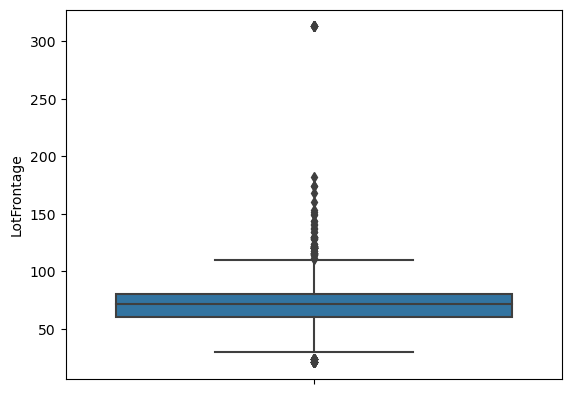

,LotFrontage
count,2060.000000
mean,72.052209
std,25.735610
min,21.000000
1%,21.000000
2%,24.000000
3%,32.000000
4%,34.000000
5%,36.000000
10%,49.900000


In [162]:
uni_num(data=df_num,x='LotFrontage')

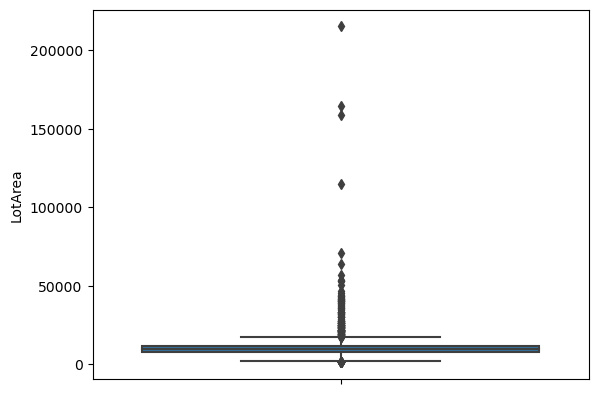

,LotArea
count,2060.000000
mean,10730.867961
std,9239.534485
min,1300.000000
1%,1881.390000
2%,2268.000000
3%,2645.000000
4%,3182.000000
5%,3675.000000
10%,5446.800000


In [163]:
uni_num(data=df_num,x='LotArea')

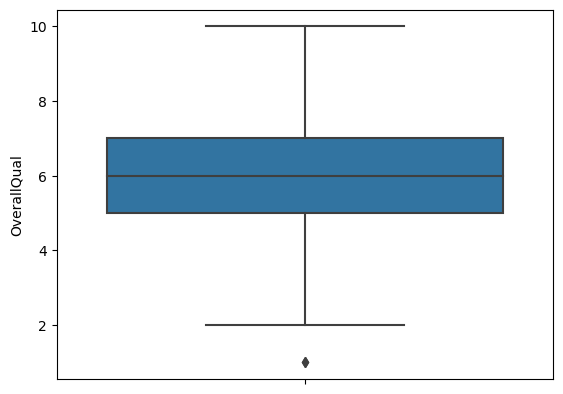

,OverallQual
count,2060.000000
mean,6.237864
std,1.519094
min,1.000000
1%,3.000000
2%,4.000000
3%,4.000000
4%,4.000000
5%,4.000000
10%,4.000000


In [164]:
uni_num(data=df_num,x='OverallQual')

In [165]:
df_c1 = pd.DataFrame()
df_c1['OverallQual'] = df_num['OverallQual']
df_c1['OverallCond'] = df_num['OverallCond']

In [166]:
df_num.drop(['OverallQual','OverallCond'],axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\784518736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(['OverallQual','OverallCond'],axis=1,inplace=True)


In [167]:
ct8 = pd.crosstab(df_c1['OverallQual'],df_c1['OverallCond'])
chi2_contingency(ct8)

Chi2ContingencyResult(statistic=1632.406028595157, pvalue=2.787715016642701e-293, dof=72, expected_freq=array([[9.70873786e-04, 4.85436893e-03, 2.52427184e-02, 1.42718447e-01,
        9.07766990e-01, 3.37864078e-01, 3.03883495e-01, 1.66990291e-01,
        1.09708738e-01],
       [1.94174757e-03, 9.70873786e-03, 5.04854369e-02, 2.85436893e-01,
        1.81553398e+00, 6.75728155e-01, 6.07766990e-01, 3.33980583e-01,
        2.19417476e-01],
       [9.70873786e-03, 4.85436893e-02, 2.52427184e-01, 1.42718447e+00,
        9.07766990e+00, 3.37864078e+00, 3.03883495e+00, 1.66990291e+00,
        1.09708738e+00],
       [1.03398058e-01, 5.16990291e-01, 2.68834951e+00, 1.51995146e+01,
        9.66771845e+01, 3.59825243e+01, 3.23635922e+01, 1.77844660e+01,
        1.16839806e+01],
       [2.43203883e-01, 1.21601942e+00, 6.32330097e+00, 3.57509709e+01,
        2.27395631e+02, 8.46349515e+01, 7.61228155e+01, 4.18310680e+01,
        2.74820388e+01],
       [2.23786408e-01, 1.11893204e+00, 5.81844660e

no of unique categories:[ 7  6  8  5  9  4 10  3  1  2]

unique categories count:10

Value count and their proportion
              count  proportion
OverallQual                   
5              501    0.243204
6              461    0.223786
7              413    0.200485
8              265    0.128641
4              213    0.103398
9              164    0.079612
3               20    0.009709
10              17    0.008252
2                4    0.001942
1                2    0.000971


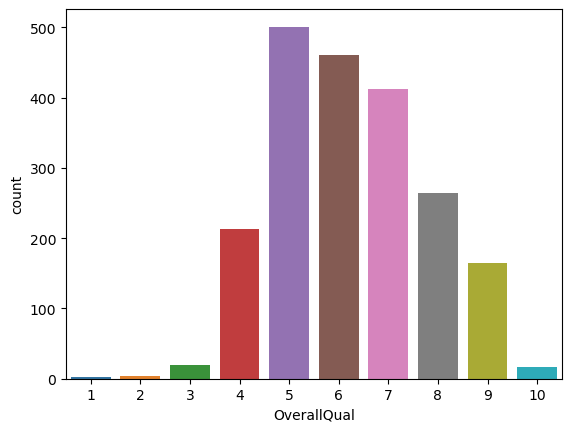

In [168]:
uni_cat(data=df_c1,x='OverallQual')

no of unique categories:[5 8 6 7 4 2 3 9 1]

unique categories count:9

Value count and their proportion
              count  proportion
OverallCond                   
5              935    0.453883
6              348    0.168932
7              313    0.151942
8              172    0.083495
4              147    0.071359
9              113    0.054854
3               26    0.012621
2                5    0.002427
1                1    0.000485


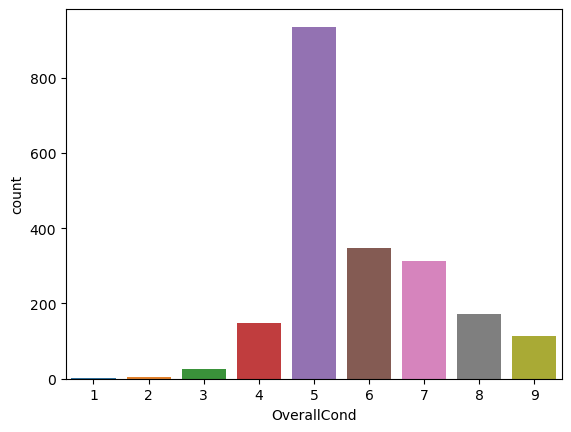

In [169]:
uni_cat(data=df_c1,x='OverallCond')

In [170]:
df_c1.drop('OverallCond',axis=1,inplace=True)

In [171]:
df_c1['OverallQual'].replace({1:3,2:3},inplace=True)

no of unique categories:[ 7  6  8  5  9  4 10  3]

unique categories count:8

Value count and their proportion
              count  proportion
OverallQual                   
5              501    0.243204
6              461    0.223786
7              413    0.200485
8              265    0.128641
4              213    0.103398
9              164    0.079612
3               26    0.012621
10              17    0.008252


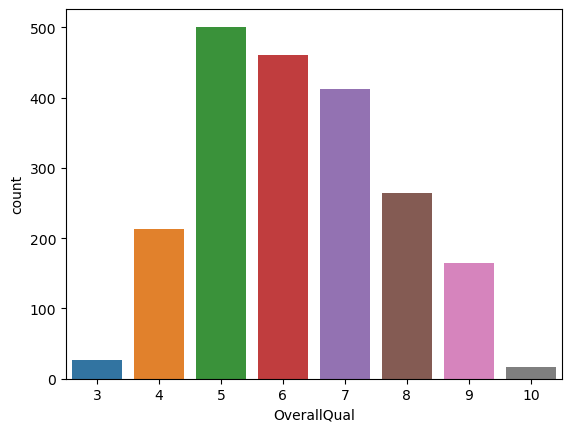

In [172]:
uni_cat(data=df_c1,x='OverallQual')

In [177]:
df_c1['OverallQual'] = df_c1['OverallQual'].astype(str)

no of unique categories:[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905
 1902 1943 1944 1909 1903]

unique categories count:117

Value count and their proportion
            count  proportion
YearBuilt                   
2005          99    0.048058
2006          84    0.040777
2004          63    0.030583
2007          58    0.028155
1977          55    0.026699
...          ...         ...
1904           1    0.000485
1898           1    0.000485
1906           1    0.00048

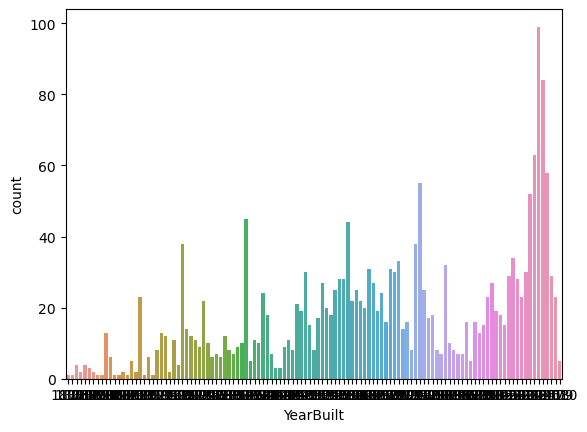

In [180]:
uni_cat(data=df_num,x='YearBuilt')

no of unique categories:[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974 2017 2011 2014 2016 2020 2012 2018 2015 2023
 2022 2019]

unique categories count:72

Value count and their proportion
               count  proportion
YearRemodAdd                   
1950            221    0.107282
2006            136    0.066019
2007            121    0.058738
2005            106    0.051456
2000             79    0.038350
...             ...         ...
2014              3    0.001456
2012              2    0.000971
2023              2    0.000971
2022              2    0.000971
2019              2    0.000971

[72 rows x 2 columns]


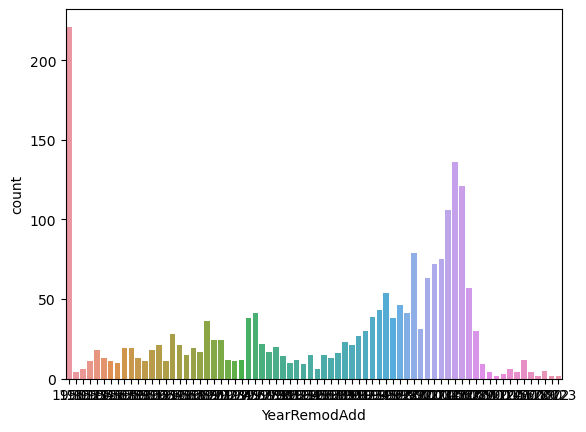

In [181]:
uni_cat(data=df_num,x='YearRemodAdd')

In [182]:
df_num['house_age1'] = 2023 - df_num['house_age']

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3323367547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['house_age1'] = 2023 - df_num['house_age']


no of unique categories:[2008 2007 2006 2009 2010]

unique categories count:5

Value count and their proportion
             count  proportion
house_age1                   
2009          503    0.244175
2007          467    0.226699
2006          424    0.205825
2008          413    0.200485
2010          253    0.122816


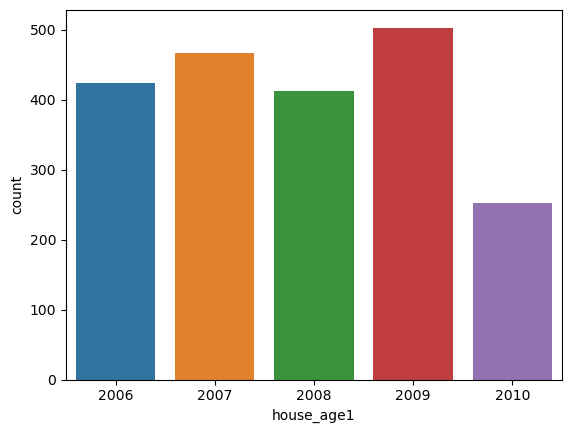

In [183]:
uni_cat(data=df_num,x='house_age1')

In [184]:
df_num.drop('house_age',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3665470043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('house_age',axis=1,inplace=True)


In [186]:
df_num['real_age'] = df_num['house_age1'] - df_num['YearBuilt']

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\1352252795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['real_age'] = df_num['house_age1'] - df_num['YearBuilt']


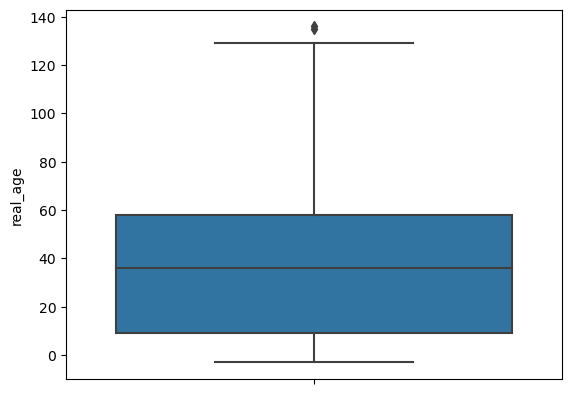

,real_age
count,2060.000000
mean,38.450971
std,30.276723
min,-3.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.360000
5%,1.000000
10%,2.000000


In [187]:
uni_num(data=df_num,x='real_age')

In [189]:
df_num['real_age'] = np.where(df_num['real_age']<0,0,df_num['real_age'])

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\270177883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['real_age'] = np.where(df_num['real_age']<0,0,df_num['real_age'])


no of unique categories:[  5  31   7  91   8  16   3  36  77  69  43   1  46  48  78  40  39   4
  51   6  42   2  59  49  81  88  15  55  57  53  41  24  33  47  89  10
  72  25  52  44   0  87  12  65  34  11  56  95  60  99  14  94  13  45
  97  90  30  76 122  54  62  20  37  68  50  71   9  38  18  58  70  32
  35  83  84  66  19  22  86  98 114  93  75  82  17 106  29  96  27  92
 128  61  67  21  26 108  28  63  73  74  80 115 126 102  85  23 110 117
 129  64 100 111 104 119 127 107 135 109 136 103  79 125 105]

unique categories count:123

Value count and their proportion
           count  proportion
real_age                   
1           121    0.058738
0            83    0.040291
4            64    0.031068
2            47    0.022816
3            45    0.021845
...         ...         ...
136           1    0.000485
114           1    0.000485
115           1    0.000485
129           1    0.000485
126           1    0.000485

[123 rows x 2 columns]


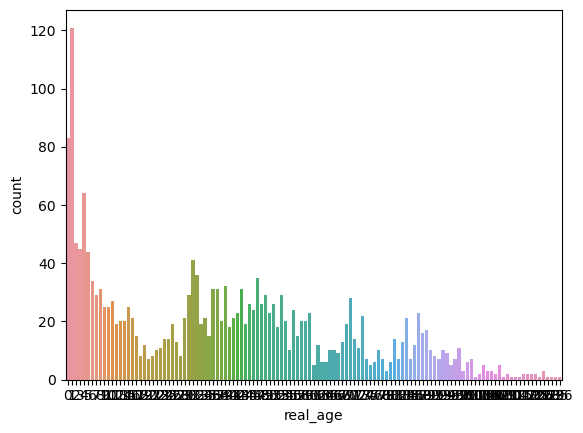

In [190]:
uni_cat(data=df_num,x='real_age')

In [191]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'Property_Sale_Price', 'age', 'house_age1', 'real_age'],
      dtype='object')

In [193]:
df_num.drop(['YearBuilt','YearRemodAdd','age','house_age1'],axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3291175957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(['YearBuilt','YearRemodAdd','age','house_age1'],axis=1,inplace=True)


In [194]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'Property_Sale_Price', 'real_age'],
      dtype='object')

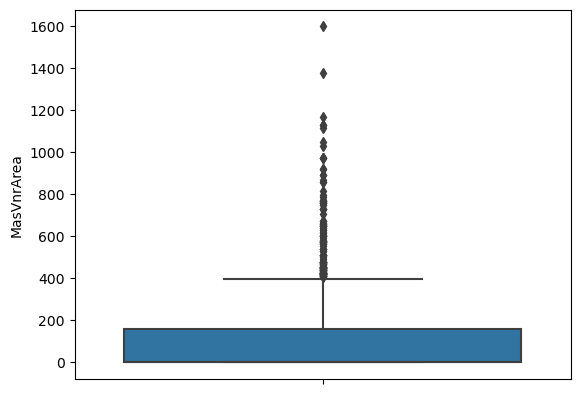

,MasVnrArea
count,2060.000000
mean,102.230694
std,178.904387
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [196]:
uni_num(data=df_num,x='MasVnrArea')

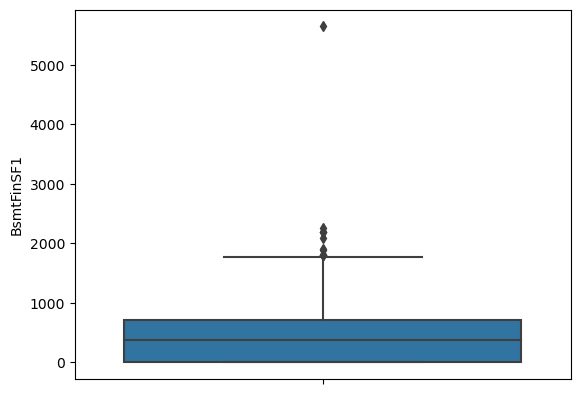

,BsmtFinSF1
count,2060.000000
mean,438.576214
std,448.731830
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [197]:
uni_num(data=df_num,x='BsmtFinSF1')

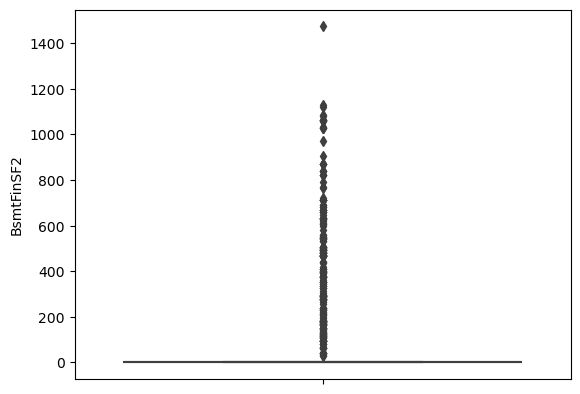

,BsmtFinSF2
count,2060.000000
mean,49.389320
std,166.016126
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [198]:
uni_num(data=df_num,x='BsmtFinSF2')

In [199]:
df_num.drop('BsmtFinSF2',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\2398822060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('BsmtFinSF2',axis=1,inplace=True)


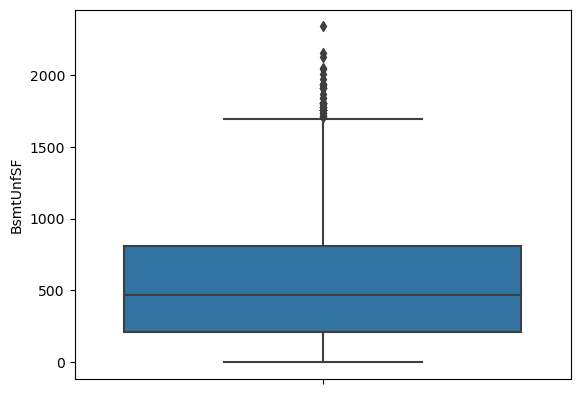

,BsmtUnfSF
count,2060.000000
mean,565.452913
std,450.490307
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,70.000000


In [200]:
uni_num(data=df_num,x='BsmtUnfSF')

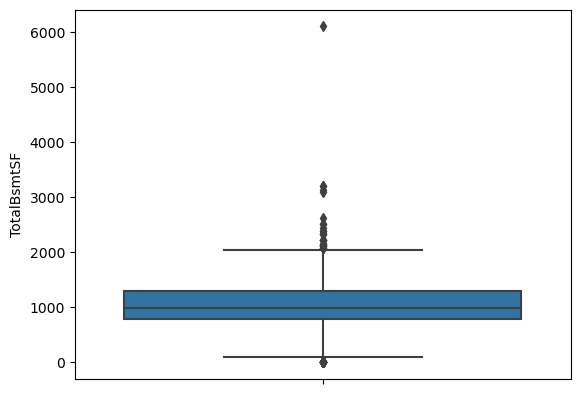

,TotalBsmtSF
count,2060.000000
mean,1053.418447
std,431.404227
min,0.000000
1%,0.000000
2%,0.000000
3%,264.000000
4%,392.640000
5%,483.000000
10%,630.000000


In [201]:
uni_num(data=df_num,x='TotalBsmtSF')

In [202]:
df_num.drop('BsmtUnfSF',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\1186979760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('BsmtUnfSF',axis=1,inplace=True)


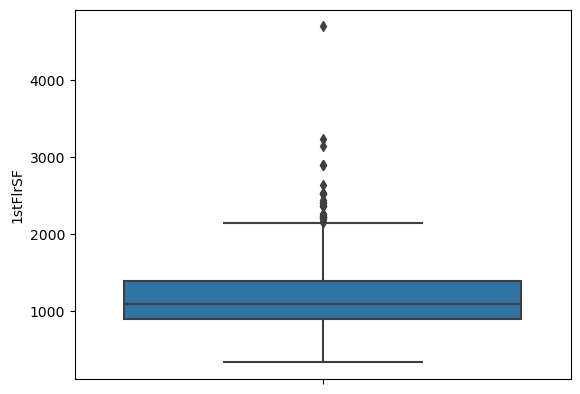

,1stFlrSF
count,2060.000000
mean,1167.010680
std,377.484783
min,334.000000
1%,531.900000
2%,606.260000
3%,630.000000
4%,672.000000
5%,684.000000
10%,764.000000


In [203]:
uni_num(data=df_num,x='1stFlrSF')

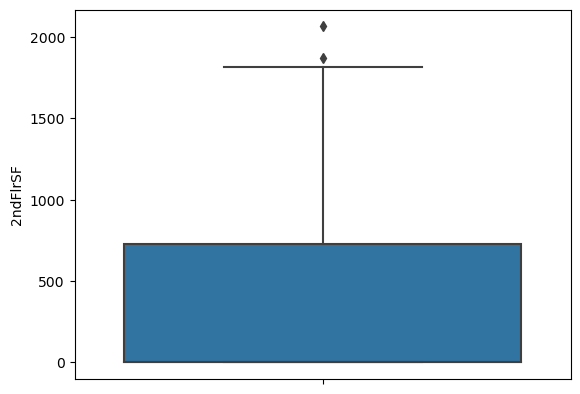

,2ndFlrSF
count,2060.000000
mean,344.482524
std,438.844272
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [204]:
uni_num(data=df_num,x='2ndFlrSF')

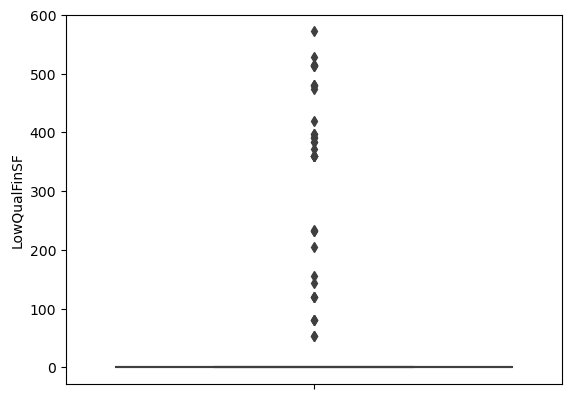

,LowQualFinSF
count,2060.000000
mean,6.207282
std,49.707725
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [205]:
uni_num(data=df_num,x='LowQualFinSF')

In [206]:
df_num.drop('LowQualFinSF',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\850476480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('LowQualFinSF',axis=1,inplace=True)


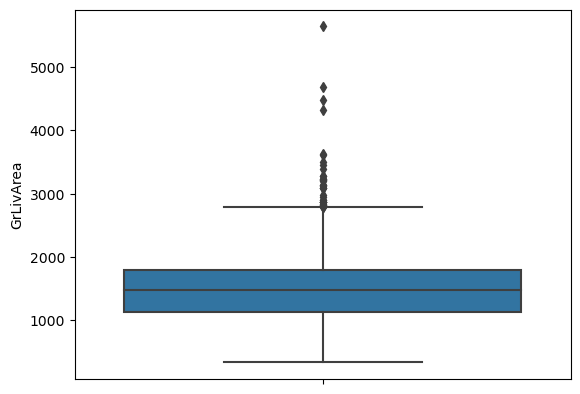

,GrLivArea
count,2060.000000
mean,1517.700485
std,517.944094
min,334.000000
1%,693.590000
2%,768.000000
3%,803.770000
4%,833.000000
5%,848.000000
10%,912.000000


In [207]:
uni_num(data=df_num,x='GrLivArea')

no of unique categories:[1 0 2 3]

unique categories count:4

Value count and their proportion
               count  proportion
BsmtFullBath                   
0              1199    0.582039
1               836    0.405825
2                23    0.011165
3                 2    0.000971


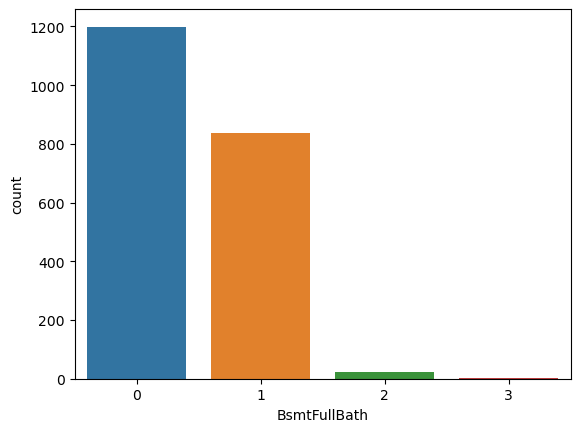

In [210]:
uni_cat(data=df_num,x='BsmtFullBath')

no of unique categories:[0 1 2]

unique categories count:3

Value count and their proportion
               count  proportion
BsmtHalfBath                   
0              1946    0.944660
1               111    0.053883
2                 3    0.001456


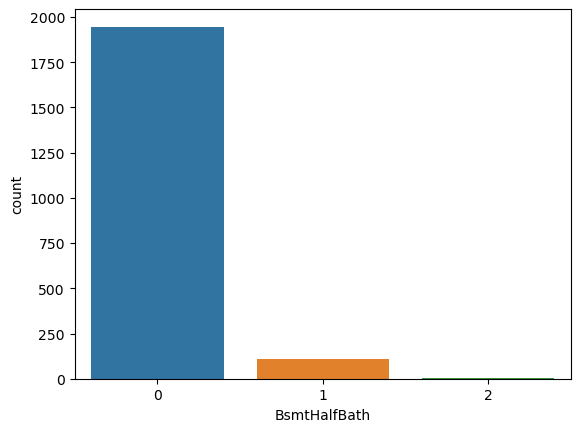

In [212]:
uni_cat(data=df_num,x='BsmtHalfBath')

In [213]:
df_c1['BsmtFullBath'] = df_num['BsmtFullBath']
df_c1['BsmtHalfBath'] = df_num['BsmtHalfBath']

In [214]:
df_num.drop(['BsmtHalfBath','BsmtFullBath'],axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\3637351776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(['BsmtHalfBath','BsmtFullBath'],axis=1,inplace=True)


no of unique categories:[2 1 3 0]

unique categories count:4

Value count and their proportion
           count  proportion
FullBath                   
2          1109    0.538350
1           896    0.434951
3            41    0.019903
0            14    0.006796


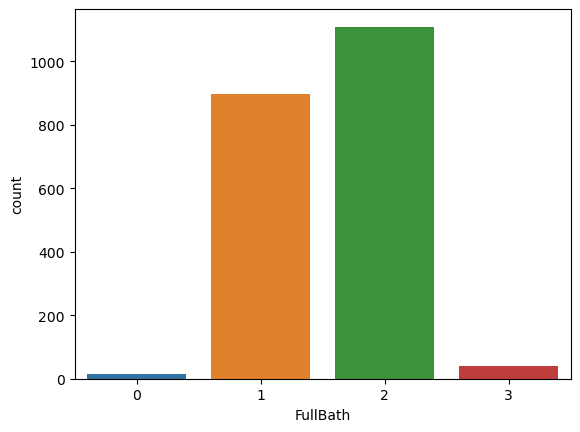

In [215]:
uni_cat(data=df_num,x='FullBath')

no of unique categories:[1 0 2]

unique categories count:3

Value count and their proportion
           count  proportion
HalfBath                   
0          1295    0.628641
1           750    0.364078
2            15    0.007282


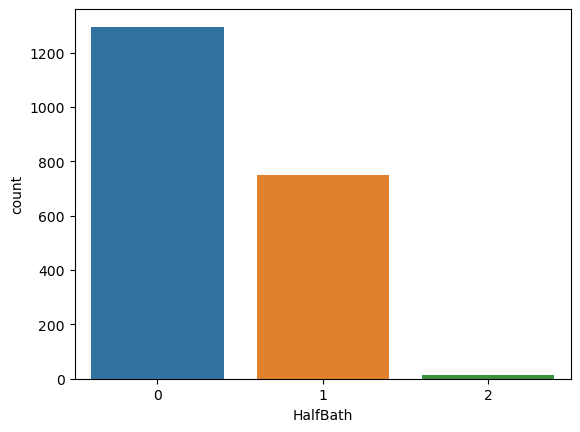

In [216]:
uni_cat(data=df_num,x='HalfBath')

In [218]:
df_c1['FullBath'] = df_num['FullBath']
df_c1['HalfBath'] = df_num['HalfBath']

In [219]:
df_num.drop(['HalfBath','FullBath'],axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\2886402359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop(['HalfBath','FullBath'],axis=1,inplace=True)


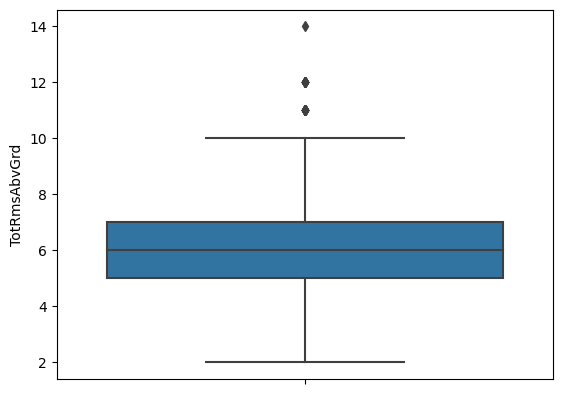

,TotRmsAbvGrd
count,2060.000000
mean,6.538350
std,1.627527
min,2.000000
1%,3.000000
2%,4.000000
3%,4.000000
4%,4.000000
5%,4.000000
10%,5.000000


In [221]:
uni_num(data=df_num,x='TotRmsAbvGrd')

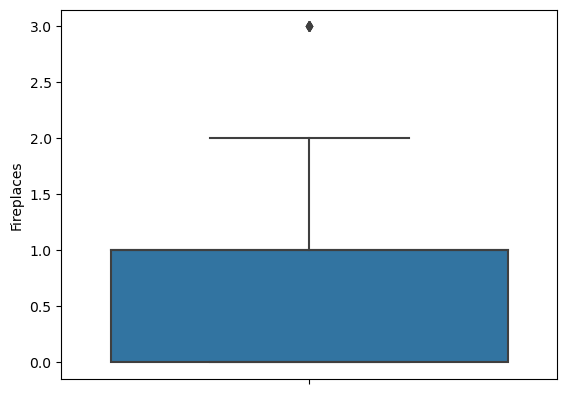

,Fireplaces
count,2060.000000
mean,0.604854
std,0.634277
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [223]:
uni_num(data=df_num,x='Fireplaces')

no of unique categories:[2 3 1 0 4]

unique categories count:5

Value count and their proportion
             count  proportion
GarageCars                   
2            1178    0.571845
1             505    0.245146
3             258    0.125243
0             113    0.054854
4               6    0.002913


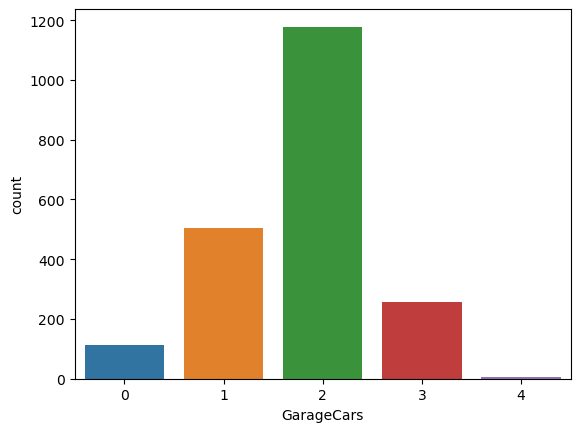

In [225]:
uni_cat(data=df_num,x='GarageCars')

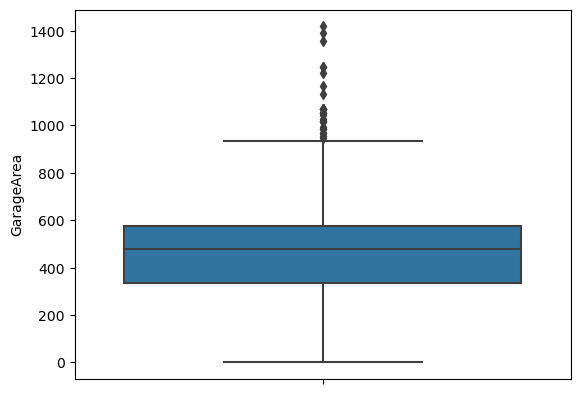

,GarageArea
count,2060.00000
mean,474.83301
std,212.51701
min,0.00000
1%,0.00000
2%,0.00000
3%,0.00000
4%,0.00000
5%,0.00000
10%,240.00000


In [227]:
uni_num(data=df_num,x='GarageArea')

In [228]:
df_c1['GarageCars'] = df_num['GarageCars']

In [229]:
df_num.drop('GarageCars',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\2816609159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('GarageCars',axis=1,inplace=True)


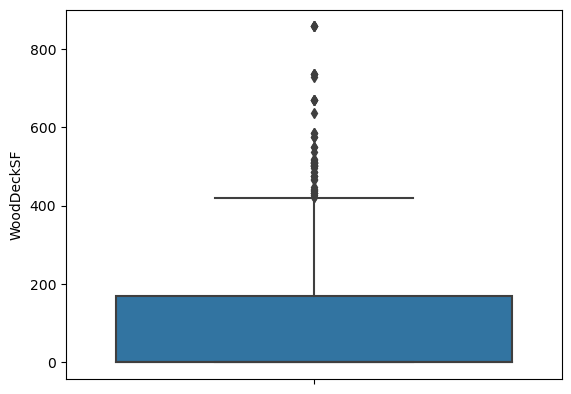

,WoodDeckSF
count,2060.000000
mean,94.610680
std,129.293515
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [230]:
uni_num(data=df_num,x='WoodDeckSF')

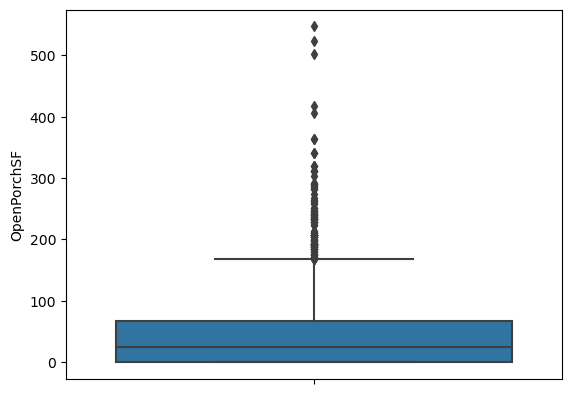

,OpenPorchSF
count,2060.000000
mean,46.114078
std,64.771838
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [231]:
uni_num(data=df_num,x='OpenPorchSF')

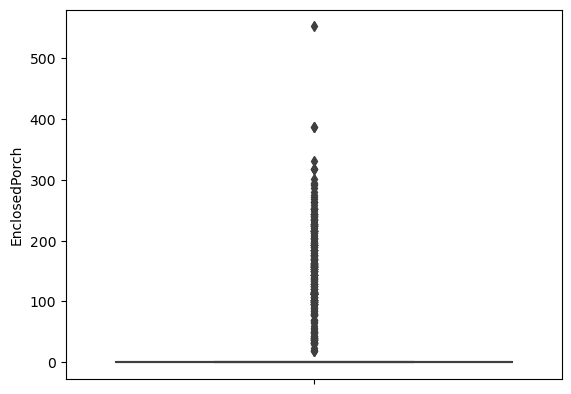

,EnclosedPorch
count,2060.000000
mean,21.028641
std,59.621069
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [232]:
uni_num(data=df_num,x='EnclosedPorch')

In [233]:
df_num.drop('EnclosedPorch',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\675253703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('EnclosedPorch',axis=1,inplace=True)


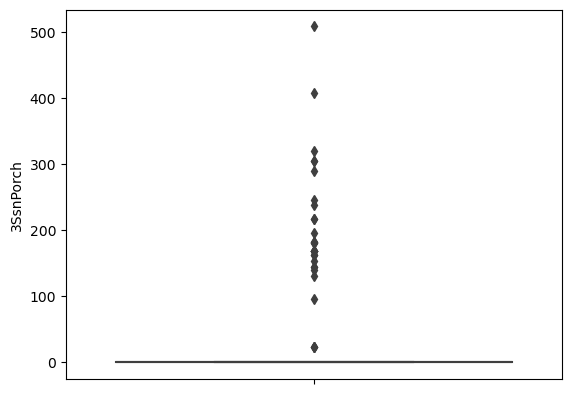

,3SsnPorch
count,2060.000000
mean,2.998058
std,26.900695
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [234]:
uni_num(data=df_num,x='3SsnPorch')

In [235]:
df_num.drop('3SsnPorch',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\378656142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('3SsnPorch',axis=1,inplace=True)


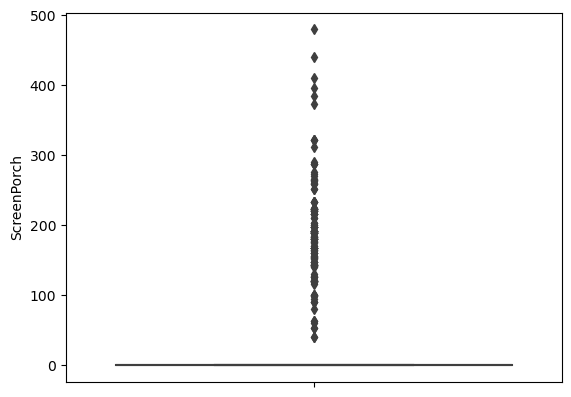

,ScreenPorch
count,2060.000000
mean,14.585922
std,54.208974
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [236]:
uni_num(data=df_num,x='ScreenPorch')

In [237]:
df_num.drop('ScreenPorch',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\892032512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('ScreenPorch',axis=1,inplace=True)


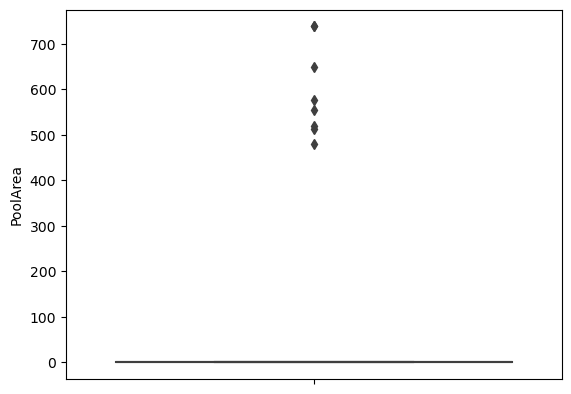

,PoolArea
count,2060.000000
mean,2.313592
std,37.528499
min,0.000000
1%,0.000000
2%,0.000000
3%,0.000000
4%,0.000000
5%,0.000000
10%,0.000000


In [238]:
uni_num(data=df_num,x='PoolArea')

In [239]:
df_num.drop('PoolArea',axis=1,inplace=True)

C:\Users\Akash Goel\AppData\Local\Temp\ipykernel_24968\1794600410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.drop('PoolArea',axis=1,inplace=True)


In [241]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'Property_Sale_Price', 'real_age'],
      dtype='object')

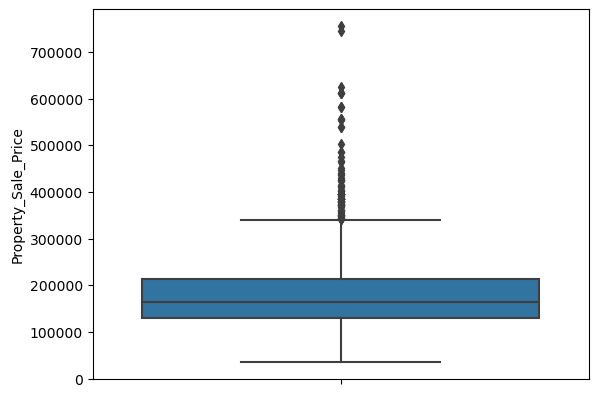

,Property_Sale_Price
count,2060.000000
mean,181159.363592
std,78838.904898
min,34900.000000
1%,64500.000000
2%,78180.000000
3%,82000.000000
4%,85000.000000
5%,88000.000000
10%,107000.000000


In [242]:
uni_num(data=df_num,x='Property_Sale_Price')

In [243]:
df_c1 = pd.get_dummies(df_c1,drop_first=True,dtype=int)

In [244]:
df_c1

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,GarageCars,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9
0,1,0,2,1,2,0,0,0,0,1,0,0
1,0,1,2,0,2,0,0,0,1,0,0,0
2,1,0,2,1,2,0,0,0,0,1,0,0
3,1,0,1,0,3,0,0,0,0,1,0,0
4,1,0,2,1,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,1,0,2,1,2,0,0,0,0,0,1,0
2069,2,0,2,0,0,0,0,0,1,0,0,0
2070,0,0,2,0,2,0,1,0,0,0,0,0
2071,0,1,1,0,2,0,0,0,0,0,0,1


In [245]:
ff = pd.concat([df_num,df_cat,df_c1],axis=1)

In [246]:
ff

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,...,FullBath,HalfBath,GarageCars,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9
0,65.000000,8450,196.0,706,856,856,854,1710,3,1,...,2,1,2,0,0,0,0,1,0,0
1,80.000000,9600,0.0,978,1262,1262,0,1262,3,1,...,2,0,2,0,0,0,1,0,0,0
2,68.000000,11250,162.0,486,920,920,866,1786,3,1,...,2,1,2,0,0,0,0,1,0,0
3,60.000000,9550,0.0,216,756,961,756,1717,3,1,...,1,0,3,0,0,0,0,1,0,0
4,84.000000,14260,350.0,655,1145,1145,1053,2198,4,1,...,2,1,3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,72.052209,8755,298.0,772,992,1022,1038,2060,3,1,...,2,1,2,0,0,0,0,0,1,0
2069,63.000000,7711,0.0,1440,1440,1440,0,1440,4,2,...,2,0,0,0,0,0,1,0,0,0
2070,313.000000,25000,0.0,0,1632,1632,0,1632,4,2,...,2,0,2,0,1,0,0,0,0,0
2071,52.000000,14375,541.0,111,819,1344,0,1344,3,1,...,1,0,2,0,0,0,0,0,0,1


In [247]:
x = ff.drop('Property_Sale_Price',axis=1)

In [249]:
y=ff['Property_Sale_Price']

In [251]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [252]:
import statsmodels.api as sm

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [255]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

C:\Users\Akash Goel\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
158,GarageFinish_NoB,inf
157,GarageType_NoB,inf
163,GarageQual_NoB,inf
123,BsmtFinType1_NoB,inf
114,BsmtQual_Others,inf
...,...,...
17,Dwell_Type_150,1.301424
133,HeatingQC_Po,1.285217
173,SaleType_ConLw,1.274096
111,Foundation_Wood,1.152625


In [257]:
x.drop(columns=['GarageFinish_NoB','GarageType_NoB','GarageQual_NoB','BsmtQual_Others'],inplace=True)

In [258]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Feature,VIF
7,GrLivArea,2182.821336
5,1stFlrSF,1318.126667
16,OverallQual,1220.375750
125,Heating_GasA,942.092781
36,Road_Type_Pave,404.668934
...,...,...
17,Dwell_Type_150,1.301421
132,HeatingQC_Po,1.285165
169,SaleType_ConLw,1.273997
111,Foundation_Wood,1.152509


In [259]:
x.drop(columns=['OverallQual','Heating_GasA','Road_Type_Pave'],inplace=True)

In [260]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Feature,VIF
7,GrLivArea,2140.300701
5,1stFlrSF,1301.726034
6,2ndFlrSF,243.199116
158,GarageQual_TA,230.472789
33,Zone_Class_RL,191.960676
...,...,...
129,HeatingQC_Po,1.282326
166,SaleType_ConLw,1.262568
125,Heating_OthW,1.223338
109,Foundation_Wood,1.151056


In [261]:
x.drop(columns=['GrLivArea','1stFlrSF','2ndFlrSF','GarageQual_TA','Zone_Class_RL'],inplace=True)

In [262]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

,Feature,VIF
138,Functional_Typ,141.279960
83,RoofStyle_Gable,119.640658
6,KitchenAbvGr,93.794434
7,TotRmsAbvGrd,83.139868
17,Dwell_Type_20,63.437655
...,...,...
161,SaleType_ConLw,1.253998
152,GarageQual_Gd,1.203199
121,Heating_OthW,1.198485
105,Foundation_Wood,1.144936


In [263]:
X = sm.add_constant(x)

In [264]:
model = sm.OLS(y,X).fit()

In [265]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.883
Model:                             OLS   Adj. R-squared:                  0.871
Method:                  Least Squares   F-statistic:                     73.27
Date:                 Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                         22:33:22   Log-Likelihood:                -23936.
No. Observations:                 2060   AIC:                         4.826e+04
Df Residuals:                     1866   BIC:                         4.935e+04
Df Model:                          193                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.662e+05   2.51e+04      6.620      0.000    1.17e+05    2.15e+05
LotFrontage             -76.0299     31.682     -2.400      0.017    -138.166     -13.894
LotArea                   0.1453      0.085      1.708      0.088      -0.022       0.312
MasVnrArea               17.7625      4.807      3.695      0.000       8.335      27.191
BsmtFinSF1                4.2303      2.736      1.546      0.122      -1.136       9.597
TotalBsmtSF              20.0658      3.263      6.149      0.000      13.666      26.466
BedroomAbvGr          -2454.6072   1404.005     -1.748      0.081   -5208.193     298.978
KitchenAbvGr          -2.176e+04   5728.333     -3.799      0.000    -3.3e+04   -1.05e+04
TotRmsAbvGrd           8412.7489    852.521      9.868      0.000    6740.754    1.01e+04
Fireplaces             1.149e+04   2694.988      4.263      0.000    6202.328    1.68e+04
GarageArea               15.8509      7.596      2.087      0.037       0.953      30.748
WoodDeckSF               22.9119      5.792      3.956      0.000      11.553      34.271
OpenPorchSF               8.8541     12.039      0.735      0.462     -14.757      32.466
real_age                 41.3992     37.233      1.112      0.266     -31.623     114.422
Dwell_Type_150         1694.3198   8943.428      0.189      0.850   -1.58e+04    1.92e+04
Dwell_Type_160        -8583.2284   6952.301     -1.235      0.217   -2.22e+04    5051.875
Dwell_Type_180         4698.3905   1.18e+04      0.399      0.690   -1.84e+04    2.78e+04
Dwell_Type_190        -1.438e+04   1.62e+04     -0.888      0.375   -4.61e+04    1.74e+04
Dwell_Type_20          5849.2618   8868.730      0.660      0.510   -1.15e+04    2.32e+04
Dwell_Type_30          5502.4768   9338.444      0.589      0.556   -1.28e+04    2.38e+04
Dwell_Type_40          1.664e+04   1.45e+04      1.148      0.251   -1.18e+04    4.51e+04
Dwell_Type_45         -1.822e+04   2.17e+04     -0.840      0.401   -6.08e+04    2.43e+04
Dwell_Type_50          -205.0505   1.04e+04     -0.020      0.984   -2.06e+04    2.02e+04
Dwell_Type_60            68.3805   9559.438      0.007      0.994   -1.87e+04    1.88e+04
Dwell_Type_70          9772.9931   1.05e+04      0.927      0.354   -1.09e+04    3.04e+04
Dwell_Type_75          2.091e+04   1.41e+04      1.482      0.138   -6754.168    4.86e+04
Dwell_Type_80           781.7298   1.12e+04      0.070      0.945   -2.12e+04    2.28e+04
Dwell_Type_85         -4234.4285   1.27e+04     -0.333      0.739   -2.92e+04    2.07e+04
Dwell_Type_90          1.555e+04    1.2e+04      1.296      0.195   -7977.516    3.91e+04
Zone_Class_FV          5465.4823   5230.498      1.045      0.296   -4792.758    1.57e+04
Zone_Class_RH          5834.3169   7137.406      0.817      0.414   -8163.821    1.98e+04
Zone_Class_R